In [ ]:
!pip install -q -U keras-tuner
!pip install -q innvestigate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.9 MB/s eta 0:00:00
ERROR: pip

Trial 30 Complete [00h 03m 05s]
val_accuracy: 0.8684210777282715

Best val_accuracy So Far: 0.9276315569877625
Total elapsed time: 00h 38m 04s
Epoch 1/10
20/20 [==============================] - 22s 1s/step - loss: 0.8170 - accuracy: 0.6938 - val_loss: 0.6030 - val_accuracy: 0.7303
Epoch 2/10
20/20 [==============================] - 17s 852ms/step - loss: 0.5234 - accuracy: 0.7850 - val_loss: 0.4214 - val_accuracy: 0.8092
Epoch 3/10
20/20 [==============================] - 17s 860ms/step - loss: 0.3502 - accuracy: 0.8779 - val_loss: 0.3225 - val_accuracy: 0.9211
Epoch 4/10
20/20 [==============================] - 18s 871ms/step - loss: 0.2894 - accuracy: 0.9202 - val_loss: 0.3215 - val_accuracy: 0.8882
Epoch 5/10
20/20 [==============================] - 20s 978ms/step - loss: 0.2487 - accuracy: 0.9055 - val_loss: 0.2603 - val_accuracy: 0.9145
Epoch 6/10
20/20 [==============================] - 18s 874ms/step - loss: 0.1691 - accuracy: 0.9642 - val_loss: 0.2750 - val_accuracy: 0.8947
Ep

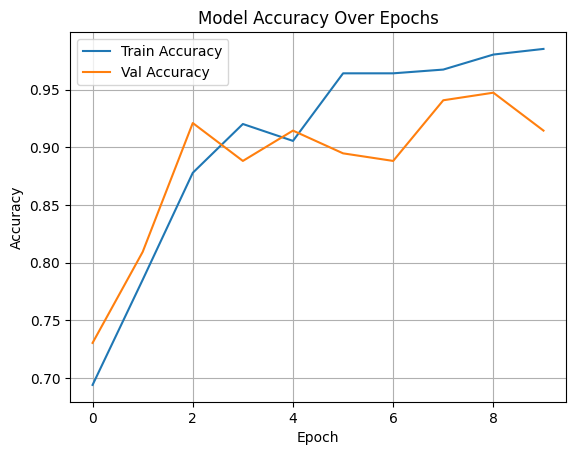

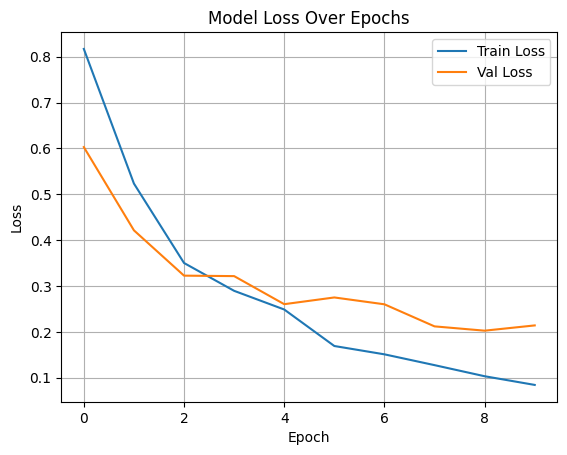

AttributeError: module 'innvestigate.utils' has no attribute 'keras'

In [ ]:
# Install necessary packages
!pip install -q -U keras-tuner
!pip install -q innvestigate

# Imports
import os
import shutil
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Paths
folder_path = "/content/drive/MyDrive/emotion detection/"
output_base = "/content/drive/MyDrive/emotion detection_sorted_final_colors_lenet"
red_folder = os.path.join(output_base, "Red")
green_folder = os.path.join(output_base, "Green")
blue_folder = os.path.join(output_base, "Blue")
os.makedirs(red_folder, exist_ok=True)
os.makedirs(green_folder, exist_ok=True)
os.makedirs(blue_folder, exist_ok=True)

# Dominant color detection
def get_dominant_color(pixels):
    r_total = np.sum(pixels[:, :, 0])
    g_total = np.sum(pixels[:, :, 1])
    b_total = np.sum(pixels[:, :, 2])
    max_color = max(r_total, g_total, b_total)
    return "Red" if max_color == r_total else "Green" if max_color == g_total else "Blue"

# Sort images into folders
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
for image_file in image_files:
    try:
        img_path = os.path.join(folder_path, image_file)
        img = Image.open(img_path).convert("RGB")
        pixels = np.array(img)
        dominant_color = get_dominant_color(pixels)
        dest = {"Red": red_folder, "Green": green_folder, "Blue": blue_folder}[dominant_color]
        shutil.copy(img_path, os.path.join(dest, image_file))
    except Exception as e:
        print(f"Error with {image_file}: {e}")

# Image generators
img_height, img_width = 128, 128
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', subset='training')
val_generator = train_datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', subset='validation')

# Define tunable LeNet model
def build_lenet(hp):
    model = Sequential()
    model.add(Conv2D(
        filters=hp.Int('conv_1_filters', 4, 16, step=4),
        kernel_size=(5, 5), activation=hp.Choice('conv_1_activation', ['tanh', 'relu']),
        padding='same', input_shape=(img_height, img_width, 3)))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=2))
    model.add(Conv2D(
        filters=hp.Int('conv_2_filters', 8, 32, step=8),
        kernel_size=(5, 5), activation=hp.Choice('conv_2_activation', ['tanh', 'relu']),
        padding='valid'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=2))
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_1_units', 60, 180, step=30),
                    activation=hp.Choice('dense_1_activation', ['tanh', 'relu'])))
    model.add(Dense(units=hp.Int('dense_2_units', 60, 120, step=20),
                    activation=hp.Choice('dense_2_activation', ['tanh', 'relu'])))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter tuning
tuner = kt.Hyperband(build_lenet, objective='val_accuracy', max_epochs=10,
                     factor=3, directory='lenet_tuner_dir', project_name='lenet_rgb_classification')
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
tuner.search(train_generator, validation_data=val_generator, epochs=10, callbacks=[stop_early])
best_hps = tuner.get_best_hyperparameters(1)[0]

# Train best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(train_generator, validation_data=val_generator, epochs=10)

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# Layer-wise Relevance Propagation (LRP)
# -------------------------------
import innvestigate
import innvestigate.utils as iutils
from tensorflow.keras.preprocessing import image

# Strip softmax for LRP
model_wo_softmax = iutils.keras.graph.model_wo_softmax(best_model)

# Create analyzer
analyzer = innvestigate.create_analyzer("lrp.epsilon", model_wo_softmax, epsilon=1e-6)

# Pick a sample image from validation set
sample_image_path = val_generator.filepaths[0]
img = image.load_img(sample_image_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Apply LRP
analysis = analyzer.analyze(img_array)

# Show original image
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Show LRP heatmap
plt.imshow(analysis[0].sum(axis=-1), cmap="seismic", clim=(-1, 1))
plt.title("LRP Heatmap")
plt.axis("off")
plt.colorbar()
plt.show()


Trial 30 Complete [00h 03m 46s]
val_accuracy: 0.9276315569877625

Best val_accuracy So Far: 0.9539473652839661
Total elapsed time: 00h 41m 45s
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 872ms/step - accuracy: 0.6265 - loss: 0.8765 - val_accuracy: 0.7566 - val_loss: 0.6987
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 848ms/step - accuracy: 0.7102 - loss: 0.6734 - val_accuracy: 0.7895 - val_loss: 0.5264
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 855ms/step - accuracy: 0.7754 - loss: 0.5312 - val_accuracy: 0.8158 - val_loss: 0.4808
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 893ms/step - accuracy: 0.7937 - loss: 0.4602 - val_accuracy: 0.8289 - val_loss: 0.4901
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 899ms/step - accuracy: 0.8162 - loss: 0.4058 - val_accuracy: 0.8224 - val_loss: 0.4137
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 866ms/step - accuracy: 0.8818 - loss: 0.3279 - val_accuracy: 0.8355 - val_loss: 0.3978
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 982ms/step - accuracy: 0.9043 - loss: 0.2

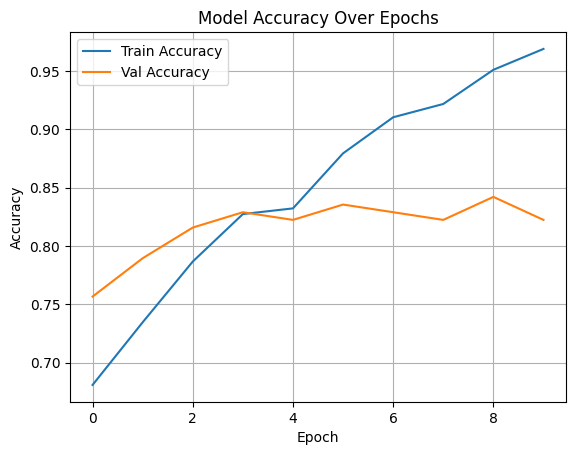

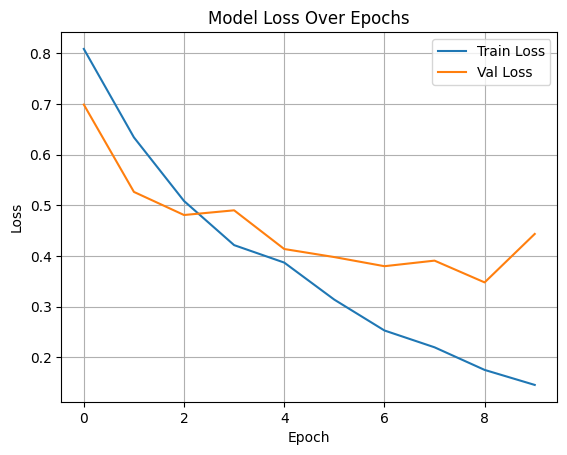

In [ ]:
# Install necessary packages
!pip install -q -U keras-tuner
#!pip install -q innvestigate

# Imports
import os
import shutil
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Paths
folder_path = "/content/drive/MyDrive/emotion detection/"
output_base = "/content/drive/MyDrive/emotion detection_sorted_final_colors_lenet"
red_folder = os.path.join(output_base, "Red")
green_folder = os.path.join(output_base, "Green")
blue_folder = os.path.join(output_base, "Blue")
os.makedirs(red_folder, exist_ok=True)
os.makedirs(green_folder, exist_ok=True)
os.makedirs(blue_folder, exist_ok=True)

# Dominant color detection
def get_dominant_color(pixels):
    r_total = np.sum(pixels[:, :, 0])
    g_total = np.sum(pixels[:, :, 1])
    b_total = np.sum(pixels[:, :, 2])
    max_color = max(r_total, g_total, b_total)
    return "Red" if max_color == r_total else "Green" if max_color == g_total else "Blue"

# Sort images into folders
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
for image_file in image_files:
    try:
        img_path = os.path.join(folder_path, image_file)
        img = Image.open(img_path).convert("RGB")
        pixels = np.array(img)
        dominant_color = get_dominant_color(pixels)
        dest = {"Red": red_folder, "Green": green_folder, "Blue": blue_folder}[dominant_color]
        shutil.copy(img_path, os.path.join(dest, image_file))
    except Exception as e:
        print(f"Error with {image_file}: {e}")

# Image generators
img_height, img_width = 128, 128
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', subset='training')
val_generator = train_datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', subset='validation')

# Define tunable LeNet model
def build_lenet(hp):
    model = Sequential()
    model.add(Conv2D(
        filters=hp.Int('conv_1_filters', 4, 16, step=4),
        kernel_size=(5, 5), activation=hp.Choice('conv_1_activation', ['tanh', 'relu']),
        padding='same', input_shape=(img_height, img_width, 3)))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=2))
    model.add(Conv2D(
        filters=hp.Int('conv_2_filters', 8, 32, step=8),
        kernel_size=(5, 5), activation=hp.Choice('conv_2_activation', ['tanh', 'relu']),
        padding='valid'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=2))
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_1_units', 60, 180, step=30),
                    activation=hp.Choice('dense_1_activation', ['tanh', 'relu'])))
    model.add(Dense(units=hp.Int('dense_2_units', 60, 120, step=20),
                    activation=hp.Choice('dense_2_activation', ['tanh', 'relu'])))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter tuning
tuner = kt.Hyperband(build_lenet, objective='val_accuracy', max_epochs=10,
                     factor=3, directory='lenet_tuner_dir', project_name='lenet_rgb_classification')
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
tuner.search(train_generator, validation_data=val_generator, epochs=10, callbacks=[stop_early])
best_hps = tuner.get_best_hyperparameters(1)[0]

# Train best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(train_generator, validation_data=val_generator, epochs=10)

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 614 images belonging to 3 classes.
Found 152 images belonging to 3 classes.
Reloading Tuner from lenet_tuner_dir/lenet_rgb_classification/tuner0.json
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6268 - loss: 0.9141 - val_accuracy: 0.7237 - val_loss: 0.6694
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 864ms/step - accuracy: 0.7116 - loss: 0.6809 - val_accuracy: 0.7895 - val_loss: 0.4922
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7822 - loss: 0.5043 - val_accuracy: 0.8684 - val_loss: 0.3976
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 993ms/step - accuracy: 0.8924 - loss: 0.3613 - val_accuracy: 0.8224 - val_loss: 0.3704
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 867ms/step - accuracy: 0.8929 - loss: 0.2900 - val_accuracy: 0.9276 - val_loss: 0.2519
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 866ms/step - accuracy: 0.9391 - lo

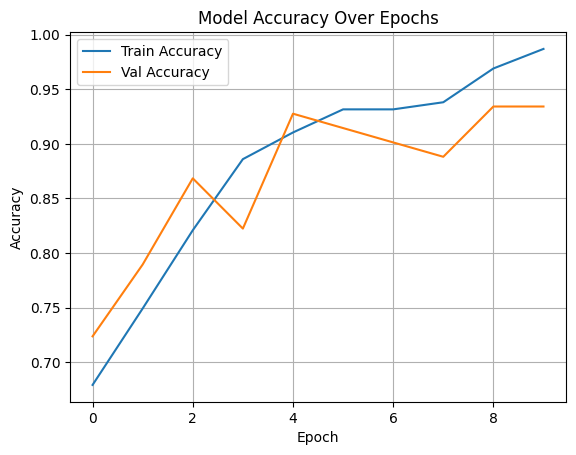

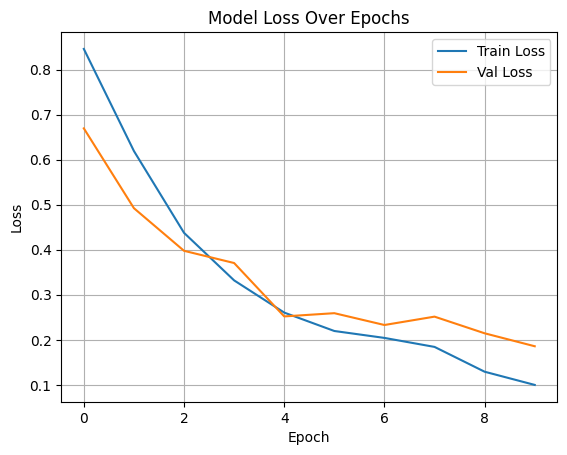

In [ ]:
# Install necessary packages
!pip install -q -U keras-tuner
#!pip install -q innvestigate

# Imports
import os
import shutil
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Paths
folder_path = "/content/drive/MyDrive/emotion detection/"
output_base = "/content/drive/MyDrive/emotion detection_sorted_final_colors_lenet"
red_folder = os.path.join(output_base, "Red")
green_folder = os.path.join(output_base, "Green")
blue_folder = os.path.join(output_base, "Blue")
os.makedirs(red_folder, exist_ok=True)
os.makedirs(green_folder, exist_ok=True)
os.makedirs(blue_folder, exist_ok=True)

# Dominant color detection
def get_dominant_color(pixels):
    r_total = np.sum(pixels[:, :, 0])
    g_total = np.sum(pixels[:, :, 1])
    b_total = np.sum(pixels[:, :, 2])
    max_color = max(r_total, g_total, b_total)
    return "Red" if max_color == r_total else "Green" if max_color == g_total else "Blue"

# Sort images into folders
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
for image_file in image_files:
    try:
        img_path = os.path.join(folder_path, image_file)
        img = Image.open(img_path).convert("RGB")
        pixels = np.array(img)
        dominant_color = get_dominant_color(pixels)
        dest = {"Red": red_folder, "Green": green_folder, "Blue": blue_folder}[dominant_color]
        shutil.copy(img_path, os.path.join(dest, image_file))
    except Exception as e:
        print(f"Error with {image_file}: {e}")

# Image generators
img_height, img_width = 128, 128
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', subset='training')
val_generator = train_datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', subset='validation')

# Define tunable LeNet model
def build_lenet(hp):
    model = Sequential()
    model.add(Conv2D(
        filters=hp.Int('conv_1_filters', 4, 16, step=4),
        kernel_size=(5, 5), activation=hp.Choice('conv_1_activation', ['tanh', 'relu']),
        padding='same', input_shape=(img_height, img_width, 3)))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=2))
    model.add(Conv2D(
        filters=hp.Int('conv_2_filters', 8, 32, step=8),
        kernel_size=(5, 5), activation=hp.Choice('conv_2_activation', ['tanh', 'relu']),
        padding='valid'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=2))
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_1_units', 60, 180, step=30),
                    activation=hp.Choice('dense_1_activation', ['tanh', 'relu'])))
    model.add(Dense(units=hp.Int('dense_2_units', 60, 120, step=20),
                    activation=hp.Choice('dense_2_activation', ['tanh', 'relu'])))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter tuning
tuner = kt.Hyperband(build_lenet, objective='val_accuracy', max_epochs=10,
                     factor=3, directory='lenet_tuner_dir', project_name='lenet_rgb_classification')
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
tuner.search(train_generator, validation_data=val_generator, epochs=10, callbacks=[stop_early])
best_hps = tuner.get_best_hyperparameters(1)[0]

# Train best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(train_generator, validation_data=val_generator, epochs=10)

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

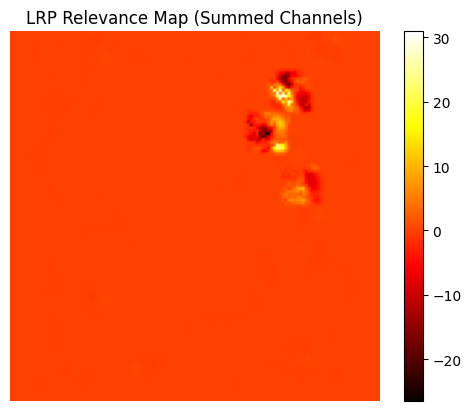

In [ ]:
def lrp(model, input_image, eps=1e-5):
    activations = [input_image]  # list to hold activations layer-wise
    x = input_image

    # Forward pass to store activations
    for layer in model.layers:
        x = layer(x)
        activations.append(x)

    # Initialize relevance from output activation for predicted class
    relevance = activations[-1].numpy()
    target_class = np.argmax(relevance[0])
    one_hot = np.zeros_like(relevance)
    one_hot[0, target_class] = relevance[0, target_class]
    relevance = tf.convert_to_tensor(one_hot, dtype=tf.float32)

    # Reverse pass
    for i in reversed(range(len(model.layers))):
        layer = model.layers[i]
        input_activation = activations[i]
        output_activation = activations[i + 1]

        if isinstance(layer, Dense):
            W = tf.maximum(layer.get_weights()[0], 0.0)  # z+ rule
            b = layer.get_weights()[1]
            z = tf.matmul(input_activation, W) + eps
            s = relevance / z
            c = tf.matmul(s, tf.transpose(W))
            relevance = input_activation * c

        elif isinstance(layer, Conv2D):
            W = tf.maximum(layer.get_weights()[0], 0.0)
            strides = [1, 1, 1, 1]
            padding = layer.padding.upper()

            z = tf.nn.conv2d(input_activation, W, strides=strides, padding=padding) + eps

            # Resize relevance if shapes mismatch
            if relevance.shape[1:3] != z.shape[1:3]:
                relevance = tf.image.resize(relevance, size=z.shape[1:3])

            s = relevance / z

            input_shape = tf.shape(input_activation)
            c = tf.raw_ops.Conv2DBackpropInput(
                input_sizes=input_shape,
                filter=W,
                out_backprop=s,
                strides=strides,
                padding=padding
            )
            relevance = input_activation * c

        elif isinstance(layer, AveragePooling2D):
            input_shape = input_activation.shape[1:3]
            relevance = tf.image.resize(relevance, size=input_shape)

        elif isinstance(layer, Flatten):
            relevance = tf.reshape(relevance, tf.shape(input_activation))

    return relevance.numpy()


# Get a sample image from validation generator
x_batch, y_batch = next(val_generator)
sample_image = x_batch[0:1]  # Shape: (1, 128, 128, 3)

# Run LRP
relevance_map = lrp(best_model, tf.convert_to_tensor(sample_image))

# Plot LRP heatmap
plt.imshow(np.sum(relevance_map[0], axis=-1), cmap='hot')
plt.title("LRP Relevance Map (Summed Channels)")
plt.axis('off')
plt.colorbar()
plt.show()


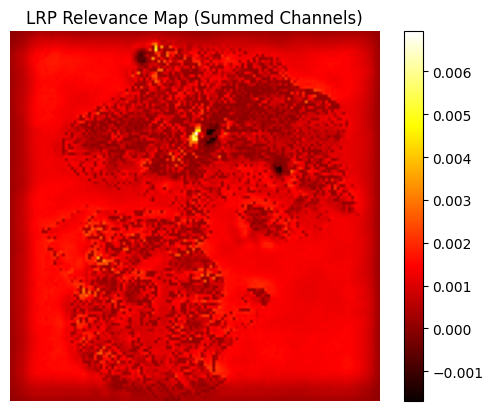

In [ ]:
def lrp(model, input_image, eps=1e-5):
    activations = [input_image]  # list to hold activations layer-wise
    x = input_image

    # Forward pass to store activations
    for layer in model.layers:
        x = layer(x)
        activations.append(x)

    # Initialize relevance from output activation for predicted class
    relevance = activations[-1].numpy()
    target_class = np.argmax(relevance[0])
    one_hot = np.zeros_like(relevance)
    one_hot[0, target_class] = relevance[0, target_class]
    relevance = tf.convert_to_tensor(one_hot, dtype=tf.float32)

    # Reverse pass
    for i in reversed(range(len(model.layers))):
        layer = model.layers[i]
        input_activation = activations[i]
        output_activation = activations[i + 1]

        if isinstance(layer, Dense):
            W = tf.maximum(layer.get_weights()[0], 0.0)  # z+ rule
            b = layer.get_weights()[1]
            z = tf.matmul(input_activation, W) + eps
            s = relevance / z
            c = tf.matmul(s, tf.transpose(W))
            relevance = input_activation * c

        elif isinstance(layer, Conv2D):
            W = tf.maximum(layer.get_weights()[0], 0.0)
            strides = [1, 1, 1, 1]
            padding = layer.padding.upper()

            z = tf.nn.conv2d(input_activation, W, strides=strides, padding=padding) + eps

            # Resize relevance if shapes mismatch
            if relevance.shape[1:3] != z.shape[1:3]:
                relevance = tf.image.resize(relevance, size=z.shape[1:3])

            s = relevance / z

            input_shape = tf.shape(input_activation)
            c = tf.raw_ops.Conv2DBackpropInput(
                input_sizes=input_shape,
                filter=W,
                out_backprop=s,
                strides=strides,
                padding=padding
            )
            relevance = input_activation * c

        elif isinstance(layer, AveragePooling2D):
            input_shape = input_activation.shape[1:3]
            relevance = tf.image.resize(relevance, size=input_shape)

        elif isinstance(layer, Flatten):
            relevance = tf.reshape(relevance, tf.shape(input_activation))

    return relevance.numpy()


# Get a sample image from validation generator
x_batch, y_batch = next(val_generator)
sample_image = x_batch[0:1]  # Shape: (1, 128, 128, 3)

# Run LRP
relevance_map = lrp(best_model, tf.convert_to_tensor(sample_image))

# Plot LRP heatmap
plt.imshow(np.sum(relevance_map[0], axis=-1), cmap='hot')
plt.title("LRP Relevance Map (Summed Channels)")
plt.axis('off')
plt.colorbar()
plt.show()


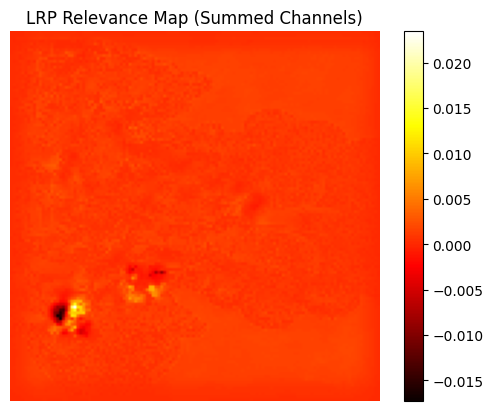

In [ ]:
def lrp(model, input_image, eps=1e-5):
    activations = [input_image]  # list to hold activations layer-wise
    x = input_image

    # Forward pass to store activations
    for layer in model.layers:
        x = layer(x)
        activations.append(x)

    # Initialize relevance from output activation for predicted class
    relevance = activations[-1].numpy()
    target_class = np.argmax(relevance[0])
    one_hot = np.zeros_like(relevance)
    one_hot[0, target_class] = relevance[0, target_class]
    relevance = tf.convert_to_tensor(one_hot, dtype=tf.float32)

    # Reverse pass
    for i in reversed(range(len(model.layers))):
        layer = model.layers[i]
        input_activation = activations[i]
        output_activation = activations[i + 1]

        if isinstance(layer, Dense):
            W = tf.maximum(layer.get_weights()[0], 0.0)  # z+ rule
            b = layer.get_weights()[1]
            z = tf.matmul(input_activation, W) + eps
            s = relevance / z
            c = tf.matmul(s, tf.transpose(W))
            relevance = input_activation * c

        elif isinstance(layer, Conv2D):
            W = tf.maximum(layer.get_weights()[0], 0.0)
            strides = [1, 1, 1, 1]
            padding = layer.padding.upper()

            z = tf.nn.conv2d(input_activation, W, strides=strides, padding=padding) + eps

            # Resize relevance if shapes mismatch
            if relevance.shape[1:3] != z.shape[1:3]:
                relevance = tf.image.resize(relevance, size=z.shape[1:3])

            s = relevance / z

            input_shape = tf.shape(input_activation)
            c = tf.raw_ops.Conv2DBackpropInput(
                input_sizes=input_shape,
                filter=W,
                out_backprop=s,
                strides=strides,
                padding=padding
            )
            relevance = input_activation * c

        elif isinstance(layer, AveragePooling2D):
            input_shape = input_activation.shape[1:3]
            relevance = tf.image.resize(relevance, size=input_shape)

        elif isinstance(layer, Flatten):
            relevance = tf.reshape(relevance, tf.shape(input_activation))

    return relevance.numpy()


# Get a sample image from validation generator
x_batch, y_batch = next(val_generator)
sample_image = x_batch[0:1]  # Shape: (1, 128, 128, 3)

# Run LRP
relevance_map = lrp(best_model, tf.convert_to_tensor(sample_image))

# Plot LRP heatmap
plt.imshow(np.sum(relevance_map[0], axis=-1), cmap='hot')
plt.title("LRP Relevance Map (Summed Channels)")
plt.axis('off')
plt.colorbar()
plt.show()



**gradcam**

In [ ]:
# Resize sample_image to match model input shape (128x128)
sample_image_resized = tf.image.resize(sample_image, (128, 128))


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image

# Load a sample image from validation set
sample_image_path = val_generator.filepaths[0]
img = image.load_img(sample_image_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img) / 255.0
img_array = img_array.astype(np.float32)  # Ensure dtype float32
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict class
preds = best_model.predict(img_array)
predicted_class = np.argmax(preds[0])

# Identify last Conv2D layer name
conv_layers = [layer.name for layer in best_model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
print("Conv2D layers found:", conv_layers)
last_conv_layer_name = conv_layers[-1]  # Take last conv layer

# Build model that outputs conv layer and predictions
grad_model = tf.keras.models.Model(
    inputs=best_model.inputs,
    outputs=[best_model.get_layer(last_conv_layer_name).output, best_model.output]
)

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Use the grad_model defined outside or build inside if preferred
    with tf.GradientTape() as tape:
        conv_outputs, predictions = model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # Compute gradients of class output w.r.t conv outputs
    grads = tape.gradient(class_channel, conv_outputs)

    # Compute channel-wise mean of gradients (global average pooling)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]

    # Weighted sum of feature maps
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    # Normalize the heatmap between 0 and 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Generate Grad-CAM heatmap
heatmap = make_gradcam_heatmap(img_array, grad_model, last_conv_layer_name, pred_index=predicted_class)

# Display heatmap
plt.matshow(heatmap)
plt.title("Grad-CAM Heatmap")
plt.axis("off")
plt.show()

# Superimpose heatmap on original image
img_orig = np.array(img).astype(np.uint8)
heatmap_resized = cv2.resize(heatmap, (img_orig.shape[1], img_orig.shape[0]))
heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img_orig, 0.6, heatmap_colored, 0.4, 0)

# Show superimposed image
plt.imshow(superimposed_img)
plt.title("Grad-CAM Overlay")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Conv2D layers found: ['conv2d_4', 'conv2d_5']


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_74']
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


KeyError: 'Exception encountered when calling Functional.call().\n\n\x1b[1m139212936755216\x1b[0m\n\nArguments received by Functional.call():\n  • inputs=array([[[[0.8784314 , 0.9372549 , 1.        ],\n         [0.88235295, 0.91764706, 1.        ],\n         [0.8666667 , 0.9137255 , 0.9607843 ],\n         ...,\n         [0.91764706, 0.94509804, 0.9764706 ],\n         [0.96862745, 0.99607843, 1.        ],\n         [0.90588236, 0.93333334, 0.972549  ]],\n\n        [[0.24313726, 0.29411766, 0.41960785],\n         [0.1254902 , 0.17254902, 0.36862746],\n         [0.3647059 , 0.43137255, 0.5019608 ],\n         ...,\n         [0.63529414, 0.67058825, 0.7294118 ],\n         [0.45490196, 0.48235294, 0.54509807],\n         [0.9647059 , 0.9882353 , 1.        ]],\n\n        [[0.34117648, 0.38431373, 0.36078432],\n         [0.28627452, 0.3137255 , 0.3764706 ],\n         [0.2       , 0.23921569, 0.24705882],\n         ...,\n         [0.54509807, 0.6156863 , 0.6627451 ],\n         [0.6039216 , 0.6509804 , 0.7058824 ],\n         [0.8862745 , 0.91764706, 0.96862745]],\n\n        ...,\n\n        [[0.63529414, 0.7294118 , 1.        ],\n         [0.05490196, 0.1764706 , 0.49019608],\n         [0.15294118, 0.23529412, 0.44313726],\n         ...,\n         [0.30588236, 0.4       , 0.6509804 ],\n         [0.05098039, 0.10588235, 0.34509805],\n         [0.79607844, 0.827451  , 0.98039216]],\n\n        [[0.10980392, 0.18431373, 0.41568628],\n         [0.09803922, 0.18431373, 0.47058824],\n         [0.13725491, 0.1882353 , 0.45490196],\n         ...,\n         [0.35686275, 0.45882353, 0.6039216 ],\n         [0.18039216, 0.2509804 , 0.4       ],\n         [0.85882354, 0.90588236, 1.        ]],\n\n        [[0.8392157 , 0.89411765, 0.92941177],\n         [0.8666667 , 0.9019608 , 0.92941177],\n         [0.8745098 , 0.91764706, 0.9411765 ],\n         ...,\n         [0.85882354, 0.8901961 , 0.9647059 ],\n         [0.8235294 , 0.84705883, 0.9490196 ],\n         [0.85490197, 0.88235295, 0.94509804]]]], dtype=float32)\n  • training=None\n  • mask=None'

In [ ]:
best_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 8)    │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 64, 64, 8)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 24)     │         4,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 30, 30, 24)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 21600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 60)             │     1,296,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 60)             │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           183 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,916,007 (14.94 MB)

 Trainable params: 1,305,335 (4.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,610,672 (9.96 MB)

In [ ]:
for i, layer in enumerate(best_model.layers):
    print(i, layer.name, type(layer))


0 conv2d_4 <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
1 average_pooling2d_4 <class 'keras.src.layers.pooling.average_pooling2d.AveragePooling2D'>
2 conv2d_5 <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
3 average_pooling2d_5 <class 'keras.src.layers.pooling.average_pooling2d.AveragePooling2D'>
4 flatten_2 <class 'keras.src.layers.reshaping.flatten.Flatten'>
5 dense_6 <class 'keras.src.layers.core.dense.Dense'>
6 dense_7 <class 'keras.src.layers.core.dense.Dense'>
7 dense_8 <class 'keras.src.layers.core.dense.Dense'>


In [ ]:
print("Best model input shape:", best_model.input_shape)
print("Grad model input shape:", grad_model.input_shape)
print("Input tensor shape:", img_tensor.shape)


Best model input shape: (None, 128, 128, 3)
Grad model input shape: (None, 128, 128, 3)
Input tensor shape: (1, 128, 128, 3)


In [ ]:
from tensorflow.keras.models import Model

last_conv_layer = best_model.get_layer('conv2d_5')
last_conv_output = last_conv_layer.output
model_output = best_model.output

grad_model = Model(inputs=best_model.input, outputs=[last_conv_output, model_output])


In [ ]:
predictions = best_model(img_tensor)
print(predictions)


tf.Tensor([[0.4664811  0.34451607 0.18900283]], shape=(1, 3), dtype=float32)


In [ ]:
predictions = best_model(img_tensor)
print(predictions)


tf.Tensor([[0.4664811  0.34451607 0.18900283]], shape=(1, 3), dtype=float32)


In [ ]:
from tensorflow.keras.preprocessing import image

img = image.load_img(sample_image_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array.astype(np.float32), axis=0)
img_tensor = tf.convert_to_tensor(img_array)


In [ ]:
best_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 8)    │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 64, 64, 8)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 24)     │         4,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 30, 30, 24)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 21600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 60)             │     1,296,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 60)             │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           183 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,916,007 (14.94 MB)

 Trainable params: 1,305,335 (4.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,610,672 (9.96 MB)

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)


In [ ]:
conv_outputs, predictions = grad_model(img_tensor)


KeyError: 'Exception encountered when calling Functional.call().\n\n\x1b[1m139212947651792\x1b[0m\n\nArguments received by Functional.call():\n  • inputs=tf.Tensor(shape=(1, 128, 128, 3), dtype=float32)\n  • training=None\n  • mask=None'

In [ ]:
from tensorflow.keras.models import Model

last_conv_layer = best_model.get_layer('conv2d_5')
grad_model = Model(inputs=best_model.input,
                   outputs=[last_conv_layer.output, best_model.output])


In [ ]:
conv_outputs, predictions = grad_model(img_tensor)


KeyError: 'Exception encountered when calling Functional.call().\n\n\x1b[1m139212947651792\x1b[0m\n\nArguments received by Functional.call():\n  • inputs=tf.Tensor(shape=(1, 128, 128, 3), dtype=float32)\n  • training=None\n  • mask=None'

In [ ]:
preds = best_model(img_tensor)
print("Predictions:", preds)


Predictions: tf.Tensor([[0.4664811  0.34451607 0.18900283]], shape=(1, 3), dtype=float32)


In [ ]:
last_conv_layer_name = "conv2d_5"
last_conv_layer = best_model.get_layer(last_conv_layer_name)

# Create a model that outputs both last conv layer activations and final predictions
grad_model = tf.keras.models.Model(
    inputs=best_model.input,
    outputs=[last_conv_layer.output, best_model.output]
)


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = val_generator.filepaths[0]  # or any valid image path
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # shape: (1, 128, 128, 3)


In [ ]:
import tensorflow as tf

def make_gradcam_heatmap(img_array, model):
    with tf.GradientTape() as tape:
        conv_outputs, predictions = model(img_array)  # Pass NumPy array directly
        pred_index = tf.argmax(predictions[0])
        loss = predictions[:, pred_index]

    # Compute gradients wrt conv layer output
    grads = tape.gradient(loss, conv_outputs)

    # Pool gradients over spatial locations
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [ ]:
from tensorflow.keras.layers import Input

input_shape = (128, 128, 3)
input_layer = Input(shape=input_shape)

# Get outputs of last conv layer and output layer by reapplying model layers on input_layer
last_conv_output = best_model.get_layer("conv2d_5").output

# To get corresponding output of last_conv_output tensor you must build new model carefully:
# Instead, use functional API to get outputs by reapplying model:

# Get the output tensors by calling best_model on input_layer
outputs = best_model(input_layer)

# Get last conv layer output from best_model.layers:
for layer in best_model.layers:
    if layer.name == "conv2d_5":
        last_conv_output_tensor = layer.output
        break

grad_model = tf.keras.Model(inputs=input_layer, outputs=[last_conv_output_tensor, outputs])


In [ ]:
# e.g. pixel values from 0 to 255
print(img_array.min(), img_array.max())
# 0.0 255.0 (or integers 0 to 255)


0.0 255.0


In [ ]:
img_array = img_array.astype("float32") / 255.0


In [ ]:
# Get last convolutional layer name
last_conv_layer_name = None
for layer in reversed(best_model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break

if last_conv_layer_name is None:
    raise ValueError("No Conv2D layer found in the model.")

# Create grad_model with functional API
last_conv_layer = best_model.get_layer(last_conv_layer_name)
grad_model = tf.keras.models.Model(
    inputs=best_model.input,
    outputs=[last_conv_layer.output, best_model.output]
)


In [ ]:
# Load and preprocess the image
from tensorflow.keras.preprocessing import image
sample_image_path = val_generator.filepaths[0]  # Path to one validation image

img = image.load_img(sample_image_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_tensor = tf.convert_to_tensor(img_array)


In [ ]:
# Check input and output details of your trained model
best_model_input = best_model.input
best_model_output = best_model.output

# Print model summary to understand layer structure
model_summary = []
best_model.summary(print_fn=lambda x: model_summary.append(x))
print("\n".join(model_summary))

# Print input and output tensor shapes
print("Model input:", best_model_input)
print("Model output:", best_model_output)


Model: "sequential_2"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 8)    │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 64, 64, 8)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 24)     │         4,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 30, 30, 24)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼───────────────────

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load and preprocess the image
img_path = "/content/drive/MyDrive/emotion detection_sorted_final_colors_lenet/Blue/00cf957af1362bd3fe04763afb154b1a.jpg"
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # normalize if your model was trained this way
img_array = np.expand_dims(img_array, axis=0).astype(np.float32)  # shape (1, 128, 128, 3)


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = "/content/drive/MyDrive/emotion detection_sorted_final_colors_lenet/Blue/00cf957af1362bd3fe04763afb154b1a.jpg"
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)

# Check model input compatibility
try:
    outputs = best_model(img_tensor)
    print("Model successfully processed the input.")
    print("Output shape(s):", [o.shape if hasattr(o, 'shape') else type(o) for o in outputs])
except Exception as e:
    print("Error when calling model:", str(e))


Model successfully processed the input.
Output shape(s): [TensorShape([3])]


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image

# 1. Identify last Conv2D layer name
last_conv_layer_name = None
for layer in reversed(best_model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break

if last_conv_layer_name is None:
    raise ValueError("No Conv2D layer found.")

print("Last Conv2D layer:", last_conv_layer_name)

# 2. Create grad model
last_conv_layer = best_model.get_layer(last_conv_layer_name)
grad_model = tf.keras.models.Model(
    inputs=best_model.input,
    outputs=[last_conv_layer.output, best_model.output]
)

# 3. Load & preprocess image
img_path = "/content/drive/MyDrive/emotion detection_sorted_final_colors_lenet/Blue/00cf957af1362bd3fe04763afb154b1a.jpg"
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_tensor = tf.expand_dims(img_array, axis=0)
img_tensor = tf.cast(img_tensor, tf.float32)

# 4. Compute gradient of predicted class w.r.t conv output
with tf.GradientTape() as tape:
    last_conv_output, predictions = grad_model(img_tensor, training=False)
    tape.watch(last_conv_output)
    pred_index = tf.argmax(predictions[0])
    class_channel = predictions[:, pred_index]

grads = tape.gradient(class_channel, last_conv_output)

# 5. Compute pooled gradients over spatial dims
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# 6. Weight conv outputs by pooled grads
conv_outputs = last_conv_output[0]
heatmap = tf.linalg.matvec(conv_outputs, pooled_grads)
heatmap = tf.nn.relu(heatmap)  # equivalent to tf.maximum(heatmap, 0)

# 7. Normalize heatmap between 0 and 1 safely
max_val = tf.reduce_max(heatmap)
heatmap = tf.cond(
    max_val > 0,
    lambda: heatmap / max_val,
    lambda: heatmap
)

# 8. Resize heatmap to original image size using tf.image.resize
heatmap_resized = tf.image.resize(
    heatmap[..., tf.newaxis],
    size=(img.height, img.width),
    method='bilinear'
)
heatmap_resized = tf.squeeze(heatmap_resized)

# 9. Plot heatmap overlay on image
plt.imshow(img)
plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
plt.axis('off')
plt.title("Grad-CAM Heatmap Overlay")
plt.show()


Last Conv2D layer: conv2d_5


KeyError: 'Exception encountered when calling Functional.call().\n\n\x1b[1m139212947651792\x1b[0m\n\nArguments received by Functional.call():\n  • inputs=tf.Tensor(shape=(1, 128, 128, 3), dtype=float32)\n  • training=False\n  • mask=None'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 614 images belonging to 3 classes.
Found 152 images belonging to 3 classes.
Reloading Tuner from lenet_tuner_dir/lenet_rgb_classification/tuner0.json
Loading existing tuner results...
Reloading Tuner from lenet_tuner_dir/lenet_rgb_classification/tuner0.json


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Training best model...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6777 - loss: 0.9161 - val_accuracy: 0.7368 - val_loss: 0.6997
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.7210 - loss: 0.6828 - val_accuracy: 0.8026 - val_loss: 0.4895
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8158 - loss: 0.4446 - val_accuracy: 0.8158 - val_loss: 0.4093
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8509 - loss: 0.3848 - val_accuracy: 0.8289 - val_loss: 0.3610
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8635 - loss: 0.3444 - val_accuracy: 0.8553 - val_loss: 0.3240
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9243 - loss: 0.2580 - val_accuracy: 0.8882 - val_loss: 0.3120
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9494 - loss: 0.2410 - val_accuracy: 0.8816 - val_loss: 0.3183
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9435 - loss: 0.2156 - val_accuracy: 0.8947 - val_loss: 0.2993
Epo

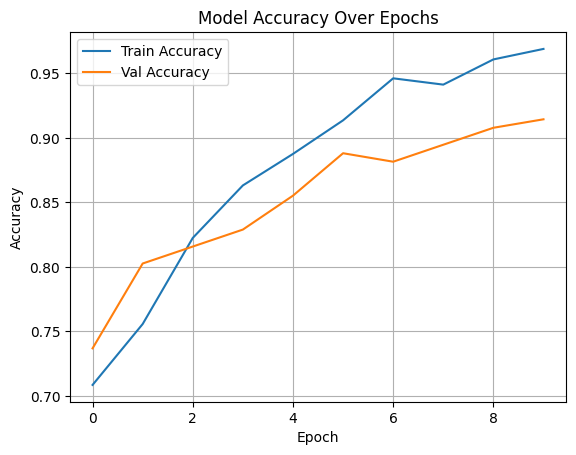

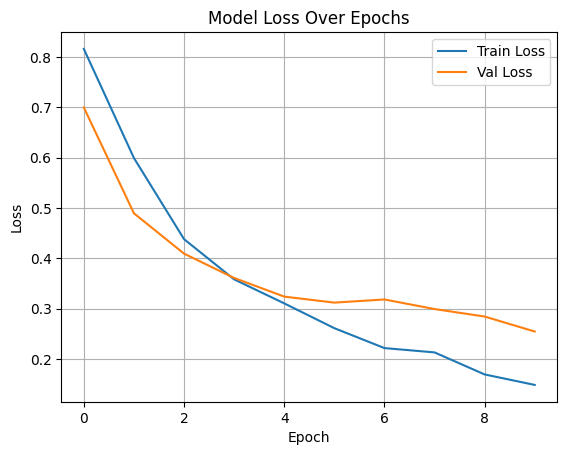

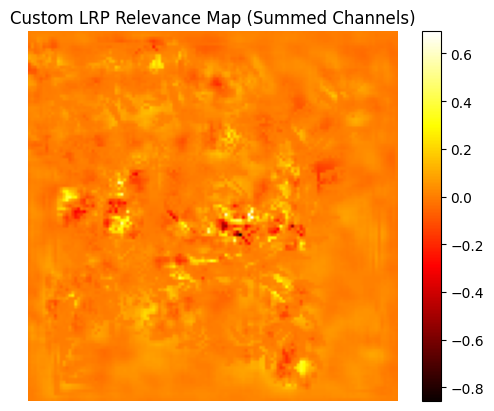

Last Conv2D layer for Grad-CAM: conv2d_9


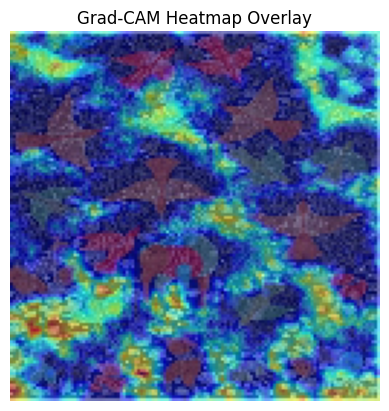

In [ ]:
# Install necessary packages
!pip install -q -U keras-tuner
# innvestigate is not needed for the custom LRP and Grad-CAM implementations
# !pip install -q innvestigate

# Imports
import os
import shutil
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model # Import Model
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Input # Import Input
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from google.colab import drive
import cv2 # Import cv2

# Mount Google Drive
drive.mount('/content/drive')

# Paths
folder_path = "/content/drive/MyDrive/emotion detection/"
output_base = "/content/drive/MyDrive/emotion detection_sorted_final_colors_lenet"
red_folder = os.path.join(output_base, "Red")
green_folder = os.path.join(output_base, "Green")
blue_folder = os.path.join(output_base, "Blue")
os.makedirs(red_folder, exist_ok=True)
os.makedirs(green_folder, exist_ok=True)
os.makedirs(blue_folder, exist_ok=True)

# Dominant color detection
def get_dominant_color(pixels):
    r_total = np.sum(pixels[:, :, 0])
    g_total = np.sum(pixels[:, :, 1])
    b_total = np.sum(pixels[:, :, 2])
    max_color = max(r_total, g_total, b_total)
    return "Red" if max_color == r_total else "Green" if max_color == g_total else "Blue"

# Sort images into folders
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
for image_file in image_files:
    try:
        img_path = os.path.join(folder_path, image_file)
        img = Image.open(img_path).convert("RGB")
        pixels = np.array(img)
        dominant_color = get_dominant_color(pixels)
        dest = {"Red": red_folder, "Green": green_folder, "Blue": blue_folder}[dominant_color]
        shutil.copy(img_path, os.path.join(dest, image_file))
    except Exception as e:
        print(f"Error with {image_file}: {e}")

# Image generators
img_height, img_width = 128, 128
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', subset='training')
val_generator = train_datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', subset='validation')

# Define tunable LeNet model
def build_lenet(hp):
    model = Sequential()
    model.add(Conv2D(
        filters=hp.Int('conv_1_filters', 4, 16, step=4),
        kernel_size=(5, 5), activation=hp.Choice('conv_1_activation', ['tanh', 'relu']),
        padding='same', input_shape=(img_height, img_width, 3)))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=2))
    model.add(Conv2D(
        filters=hp.Int('conv_2_filters', 8, 32, step=8),
        kernel_size=(5, 5), activation=hp.Choice('conv_2_activation', ['tanh', 'relu']),
        padding='valid'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=2))
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_1_units', 60, 180, step=30),
                    activation=hp.Choice('dense_1_activation', ['tanh', 'relu'])))
    model.add(Dense(units=hp.Int('dense_2_units', 60, 120, step=20),
                    activation=hp.Choice('dense_2_activation', ['tanh', 'relu'])))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter tuning
tuner = kt.Hyperband(build_lenet, objective='val_accuracy', max_epochs=10,
                     factor=3, directory='lenet_tuner_dir', project_name='lenet_rgb_classification')
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Check if tuner results exist and load them, otherwise perform the search
if not os.path.exists('lenet_tuner_dir/lenet_rgb_classification'):
    print("Running hyperparameter search...")
    tuner.search(train_generator, validation_data=val_generator, epochs=10, callbacks=[stop_early])
else:
    print("Loading existing tuner results...")
    tuner = kt.Hyperband(build_lenet, objective='val_accuracy', max_epochs=10,
                         factor=3, directory='lenet_tuner_dir', project_name='lenet_rgb_classification')
    tuner.reload()

best_hps = tuner.get_best_hyperparameters(1)[0]

# Train best model
best_model = tuner.hypermodel.build(best_hps)

# Check if model weights exist and load them, otherwise train the model
# Corrected the file extension to meet the requirement of save_weights
model_save_path = 'best_lenet_model.weights.h5'
if os.path.exists(model_save_path):
    print("Loading best model weights...")
    best_model.load_weights(model_save_path)
    history = None # No training history if loaded
else:
    print("Training best model...")
    history = best_model.fit(train_generator, validation_data=val_generator, epochs=10)
    best_model.save_weights(model_save_path) # Save weights after training

# Plot Accuracy (only if model was trained)
if history:
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title("Model Accuracy Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Loss (only if model was trained)
if history:
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("Model Loss Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()


# -------------------------------
# Layer-wise Relevance Propagation (LRP) - Custom Implementation
# -------------------------------

def lrp(model, input_image, eps=1e-5):
    activations = [input_image]
    x = input_image

    # Forward pass to store activations
    for layer in model.layers:
        x = layer(x)
        activations.append(x)

    # Initialize relevance from output activation for predicted class
    relevance = activations[-1].numpy()
    target_class = np.argmax(relevance[0])
    one_hot = np.zeros_like(relevance)
    one_hot[0, target_class] = relevance[0, target_class]
    relevance = tf.convert_to_tensor(one_hot, dtype=tf.float32)

    # Reverse pass
    for i in reversed(range(len(model.layers))):
        layer = model.layers[i]
        input_activation = activations[i]
        output_activation = activations[i + 1]

        if isinstance(layer, Dense):
            # Apply z+ rule for dense layers
            W = tf.maximum(layer.get_weights()[0], 0.0)
            # No bias term in z+ rule for simplicity or if not needed for this variant
            z = tf.matmul(input_activation, W) + eps
            s = relevance / z
            c = tf.matmul(s, tf.transpose(W))
            relevance = input_activation * c

        elif isinstance(layer, Conv2D):
            # Apply z+ rule for conv layers
            W = tf.maximum(layer.get_weights()[0], 0.0)
            strides = [1] + list(layer.strides) + [1] # Adjust strides based on layer
            padding = layer.padding.upper()

            # Calculate z using the input activation and positive weights
            z = tf.nn.conv2d(input_activation, W, strides=strides, padding=padding) + eps

            # Resize relevance if shapes mismatch (e.g., after pooling)
            if relevance.shape[1:3] != z.shape[1:3]:
                relevance = tf.image.resize(relevance, size=tf.shape(z)[1:3], method='bilinear') # Use bilinear for resize

            # Compute s based on relevance and z
            s = relevance / z

            # Compute c using Conv2DBackpropInput
            input_shape = tf.shape(input_activation)
            c = tf.raw_ops.Conv2DBackpropInput(
                input_sizes=input_shape,
                filter=W,
                out_backprop=s,
                strides=strides,
                padding=padding,
                data_format='NHWC' # Assuming data format is NHWC
            )
            relevance = input_activation * c

        elif isinstance(layer, AveragePooling2D):
            # Distribute relevance from output to input for pooling layers
            input_shape = tf.shape(input_activation)[1:3]
            # Need to upsample relevance and distribute evenly
            pool_size = layer.pool_size
            strides = layer.strides
            # Calculate kernel size and strides for backprop based on pooling
            kernel_h, kernel_w = pool_size
            stride_h, stride_w = strides

            # Resize relevance to the input shape of the pooling layer
            relevance_upsampled = tf.image.resize(
                relevance,
                size=input_shape,
                method='nearest' # Nearest neighbor is often used for simple upsampling in LRP
            )

            # Distribute the relevance evenly over the pool size
            # For AveragePooling, each input pixel contributes 1/(k_h*k_w) to each output pixel
            # So relevance is multiplied by (k_h*k_w) and distributed
            relevance = relevance_upsampled * (kernel_h * kernel_w)


        elif isinstance(layer, Flatten):
            # Reshape relevance back to the shape of the input activation
            relevance = tf.reshape(relevance, tf.shape(input_activation))

    # The final relevance is the relevance propagated back to the input layer
    return relevance.numpy()


# Check if validation generator has images before attempting LRP
if len(val_generator.filepaths) > 0:
    # Get a sample image from validation generator
    # Note: train_generator and val_generator yield batches.
    # You need to ensure you're getting a batch correctly.
    # Using next(val_generator) gets one batch.
    x_batch, y_batch = next(val_generator)
    sample_image_lrp = x_batch[0:1]  # Take the first image from the batch, shape: (1, 128, 128, 3)

    # Run Custom LRP
    try:
        relevance_map_custom = lrp(best_model, tf.convert_to_tensor(sample_image_lrp))

        # Plot Custom LRP heatmap
        # Assuming relevance_map_custom shape is (1, height, width, channels)
        plt.imshow(np.sum(relevance_map_custom[0], axis=-1), cmap='hot')
        plt.title("Custom LRP Relevance Map (Summed Channels)")
        plt.axis('off')
        plt.colorbar()
        plt.show()
    except Exception as e:
         print(f"Error during custom LRP analysis: {e}")

else:
    print("No images found in validation generator for Custom LRP.")


# -------------------------------
# Grad-CAM - Custom Implementation
# -------------------------------

# Ensure val_generator has images before attempting Grad-CAM
if len(val_generator.filepaths) > 0:
    # Load and preprocess the image for Grad-CAM
    # You can use the same image as LRP or pick another one
    sample_image_path_gradcam = val_generator.filepaths[0]
    img_gradcam = image.load_img(sample_image_path_gradcam, target_size=(img_height, img_width))
    img_array_gradcam = image.img_to_array(img_gradcam) / 255.0
    img_tensor_gradcam = tf.expand_dims(img_array_gradcam, axis=0)
    img_tensor_gradcam = tf.cast(img_tensor_gradcam, tf.float32)

    # 1. Identify last Conv2D layer name
    last_conv_layer_name = None
    for layer in reversed(best_model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            last_conv_layer_name = layer.name
            break

    if last_conv_layer_name is None:
        print("No Conv2D layer found for Grad-CAM.")
    else:
        print("Last Conv2D layer for Grad-CAM:", last_conv_layer_name)

        # 2. Create grad model using a new Input layer and reapplying layers
        # Define a new Input layer for the grad_model with the same shape as the best_model input
        input_layer_gradcam = tf.keras.Input(shape=best_model.input_shape[1:]) # Use shape without batch dim

        # Build a sub-model up to the last convolutional layer and the full model output
        x = input_layer_gradcam
        last_conv_output_tensor_gradcam = None
        # Iterate through the layers of best_model to build the graph for grad_model
        for layer in best_model.layers:
             # Apply the layer's logic to the current tensor `x`
            x = layer(x)
            if layer.name == last_conv_layer_name:
                 # Capture the output tensor at the last conv layer
                last_conv_output_tensor_gradcam = x

        # The variable 'x' now holds the final output tensor of the model after going through all layers
        model_output_tensor_gradcam = x


        # Create the grad_model with the new input and desired outputs
        grad_model = tf.keras.models.Model(
            inputs=input_layer_gradcam,
            outputs=[last_conv_output_tensor_gradcam, model_output_tensor_gradcam]
        )

        # 3. Define make_gradcam_heatmap function
        def make_gradcam_heatmap(img_tensor, model):
            with tf.GradientTape() as tape:
                # Call the grad_model with the input tensor
                last_conv_output, predictions = model(img_tensor, training=False)
                # Watch the output of the last conv layer
                tape.watch(last_conv_output)
                # Get the predicted class index
                pred_index = tf.argmax(predictions[0])
                # Get the output score for the predicted class
                class_channel = predictions[:, pred_index]

            # Compute the gradient of the predicted class score with respect to the output of the last conv layer
            grads = tape.gradient(class_channel, last_conv_output)

            # Compute the channel-wise mean of the gradients over the spatial dimensions (height and width)
            pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

            # Get the feature maps from the last convolutional layer for the specific image
            conv_outputs = last_conv_output[0]

            # Compute the heatmap as a weighted sum of the feature maps, where the weights are the pooled gradients
            # This is done using matrix-vector multiplication: (height * width * channels) @ (channels) -> (height * width)
            heatmap = tf.linalg.matvec(conv_outputs, pooled_grads)
            # Apply ReLU to the heatmap to keep only positive contributions
            heatmap = tf.nn.relu(heatmap)

            # Normalize the heatmap to a range between 0 and 1
            max_val = tf.reduce_max(heatmap)
            # Handle the case where max_val is 0 to avoid division by zero
            heatmap = tf.cond(
                max_val > 0,
                lambda: heatmap / max_val,
                lambda: heatmap
            )
            # Return the heatmap as a NumPy array
            return heatmap.numpy()

        # 4. Generate Grad-CAM heatmap
        try:
            heatmap_gradcam = make_gradcam_heatmap(img_tensor_gradcam, grad_model)

            # 5. Resize heatmap to original image size using tf.image.resize
            # Add a channel dimension to the heatmap for resizing
            heatmap_resized_gradcam = tf.image.resize(
                heatmap_gradcam[..., tf.newaxis],
                size=(img_gradcam.height, img_gradcam.width),
                method='bilinear' # Use bilinear interpolation for smooth resizing
            )
            # Remove the added channel dimension
            heatmap_resized_gradcam = tf.squeeze(heatmap_resized_gradcam)

            # 6. Plot heatmap overlay on image
            plt.imshow(img_gradcam) # Display the original image
            # Display the heatmap as an overlay with transparency
            plt.imshow(heatmap_resized_gradcam, cmap='jet', alpha=0.5) # 'jet' colormap is common for heatmaps
            plt.axis('off') # Turn off axis
            plt.title("Grad-CAM Heatmap Overlay") # Set title
            plt.show() # Show the plot

        except Exception as e:
             print(f"Error during Grad-CAM analysis: {e}")

else:
    print("No images found in validation generator for Grad-CAM.")

In [ ]:
import os

# Extract and print the image filename
image_filename = os.path.basename(sample_image_path_gradcam)
print("Image used for LRP and Grad-CAM:", image_filename)


Image used for LRP and Grad-CAM: 00cf957af1362bd3fe04763afb154b1a.jpg


Using image: /content/drive/MyDrive/emotion detection_sorted_final_colors_lenet/Red/6b15ec1dd6c1e71abca0aa1c92dec890.jpg


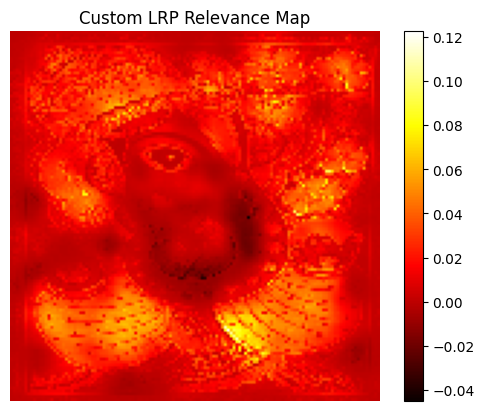

In [ ]:
from tensorflow.keras.preprocessing import image

# --- SETTINGS ---
custom_image_filename = "6b15ec1dd6c1e71abca0aa1c92dec890.jpg"
search_dirs = [red_folder, green_folder, blue_folder]
img_height, img_width = 128, 128

# --- FIND IMAGE PATH ---
sample_image_path = None
for folder in search_dirs:
    potential_path = os.path.join(folder, custom_image_filename)
    if os.path.exists(potential_path):
        sample_image_path = potential_path
        break

if sample_image_path is None:
    raise FileNotFoundError(f"{custom_image_filename} not found in Red/Green/Blue folders.")
print(f"Using image: {sample_image_path}")

# --- LOAD AND PREPROCESS IMAGE ---
img_custom = image.load_img(sample_image_path, target_size=(img_height, img_width))
img_array_custom = image.img_to_array(img_custom) / 255.0
img_tensor_custom = tf.expand_dims(img_array_custom, axis=0)
img_tensor_custom = tf.cast(img_tensor_custom, tf.float32)

# -------------------------------
# Layer-wise Relevance Propagation (LRP)
# -------------------------------
def lrp(model, input_image, eps=1e-5):
    activations = [input_image]
    x = input_image
    for layer in model.layers:
        x = layer(x)
        activations.append(x)

    relevance = activations[-1].numpy()
    target_class = np.argmax(relevance[0])
    one_hot = np.zeros_like(relevance)
    one_hot[0, target_class] = relevance[0, target_class]
    relevance = tf.convert_to_tensor(one_hot, dtype=tf.float32)

    for i in reversed(range(len(model.layers))):
        layer = model.layers[i]
        input_activation = activations[i]
        output_activation = activations[i + 1]

        if isinstance(layer, Dense):
            W = tf.maximum(layer.get_weights()[0], 0.0)
            z = tf.matmul(input_activation, W) + eps
            s = relevance / z
            c = tf.matmul(s, tf.transpose(W))
            relevance = input_activation * c

        elif isinstance(layer, Conv2D):
            W = tf.maximum(layer.get_weights()[0], 0.0)
            strides = [1] + list(layer.strides) + [1]
            padding = layer.padding.upper()
            z = tf.nn.conv2d(input_activation, W, strides=strides, padding=padding) + eps
            if relevance.shape[1:3] != z.shape[1:3]:
                relevance = tf.image.resize(relevance, size=tf.shape(z)[1:3], method='bilinear')
            s = relevance / z
            input_shape = tf.shape(input_activation)
            c = tf.raw_ops.Conv2DBackpropInput(
                input_sizes=input_shape,
                filter=W,
                out_backprop=s,
                strides=strides,
                padding=padding,
                data_format='NHWC'
            )
            relevance = input_activation * c

        elif isinstance(layer, AveragePooling2D):
            input_shape = tf.shape(input_activation)[1:3]
            pool_size = layer.pool_size
            strides = layer.strides
            kernel_h, kernel_w = pool_size
            relevance_upsampled = tf.image.resize(relevance, size=input_shape, method='nearest')
            relevance = relevance_upsampled * (kernel_h * kernel_w)

        elif isinstance(layer, Flatten):
            relevance = tf.reshape(relevance, tf.shape(input_activation))

    return relevance.numpy()

# --- Run and Plot LRP ---
try:
    relevance_map = lrp(best_model, img_tensor_custom)
    plt.imshow(np.sum(relevance_map[0], axis=-1), cmap='hot')
    plt.title("Custom LRP Relevance Map")
    plt.axis('off')
    plt.colorbar()
    plt.show()
except Exception as e:
    print(f"Error in LRP: {e}")

# -------------------------------
# Grad-CAM
# -------------------------------
def make_gradcam_heatmap(img_tensor, model):
    with tf.GradientTape() as tape:
        last_conv_output, predictions = model(img_tensor, training=False)
        tape.watch(last_conv_output)
        pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = last_conv_output[0]
    heatmap = tf.linalg.matvec(conv_outputs, pooled_grads)
    heatmap = tf.nn.relu(heatmap)
    max_val = tf.reduce_max(heatmap)
    heatmap = tf.cond(max_val > 0, lambda: heatmap / max_val, lambda: heatmap)
    return heatmap.numpy()

# --- Create grad_model ---
last_conv_layer_name = None
for layer in reversed(best_model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break

input_layer = tf.keras.Input(shape=best_model.input_shape[1:])
x = input_layer
last_conv_output = None
for layer in best_model.layers:
    x = layer(x)
    if layer.name == last_conv_layer_name:
        last_conv_output = x

grad_model = tf.keras.models.Model(inputs=input_layer, outputs=[last_conv_output, x])

# --- Generate and Plot Grad-CAM ---
try:
    heatmap = make_gradcam_heatmap(img_tensor_custom, grad_model)
    heatmap_resized = tf.image.resize(heatmap[..., tf.newaxis], size=(img_height, img_width))
    heatmap_resized = tf.squeeze(heatmap_resized)

    plt.imshow(img_custom)
    plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
    plt.axis('off')
    plt.title("Grad-CAM Heatmap Overlay")
    plt.show()
except Exception as e:
    print(f"Error in Grad-CAM: {e}")


Using image: /content/drive/MyDrive/emotion detection_sorted_final_colors_lenet/Blue/WhatsApp Image 2025-05-29 at 11.01.42_8b1eb981.jpg


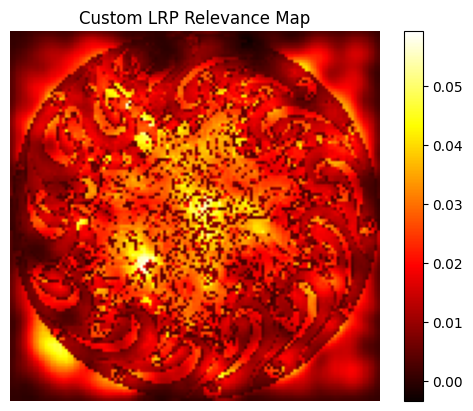

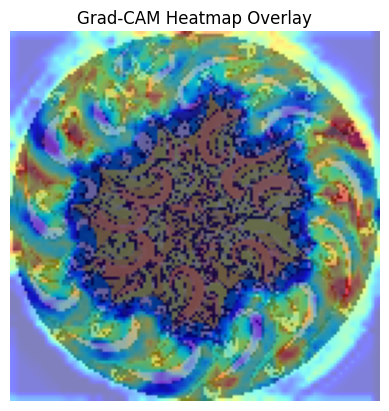

In [ ]:
from tensorflow.keras.preprocessing import image

# --- SETTINGS ---
custom_image_filename = "WhatsApp Image 2025-05-29 at 11.01.42_8b1eb981.jpg"
search_dirs = [red_folder, green_folder, blue_folder]
img_height, img_width = 128, 128

# --- FIND IMAGE PATH ---
sample_image_path = None
for folder in search_dirs:
    potential_path = os.path.join(folder, custom_image_filename)
    if os.path.exists(potential_path):
        sample_image_path = potential_path
        break

if sample_image_path is None:
    raise FileNotFoundError(f"{custom_image_filename} not found in Red/Green/Blue folders.")
print(f"Using image: {sample_image_path}")

# --- LOAD AND PREPROCESS IMAGE ---
img_custom = image.load_img(sample_image_path, target_size=(img_height, img_width))
img_array_custom = image.img_to_array(img_custom) / 255.0
img_tensor_custom = tf.expand_dims(img_array_custom, axis=0)
img_tensor_custom = tf.cast(img_tensor_custom, tf.float32)

# -------------------------------
# Layer-wise Relevance Propagation (LRP)
# -------------------------------
def lrp(model, input_image, eps=1e-5):
    activations = [input_image]
    x = input_image
    for layer in model.layers:
        x = layer(x)
        activations.append(x)

    relevance = activations[-1].numpy()
    target_class = np.argmax(relevance[0])
    one_hot = np.zeros_like(relevance)
    one_hot[0, target_class] = relevance[0, target_class]
    relevance = tf.convert_to_tensor(one_hot, dtype=tf.float32)

    for i in reversed(range(len(model.layers))):
        layer = model.layers[i]
        input_activation = activations[i]
        output_activation = activations[i + 1]

        if isinstance(layer, Dense):
            W = tf.maximum(layer.get_weights()[0], 0.0)
            z = tf.matmul(input_activation, W) + eps
            s = relevance / z
            c = tf.matmul(s, tf.transpose(W))
            relevance = input_activation * c

        elif isinstance(layer, Conv2D):
            W = tf.maximum(layer.get_weights()[0], 0.0)
            strides = [1] + list(layer.strides) + [1]
            padding = layer.padding.upper()
            z = tf.nn.conv2d(input_activation, W, strides=strides, padding=padding) + eps
            if relevance.shape[1:3] != z.shape[1:3]:
                relevance = tf.image.resize(relevance, size=tf.shape(z)[1:3], method='bilinear')
            s = relevance / z
            input_shape = tf.shape(input_activation)
            c = tf.raw_ops.Conv2DBackpropInput(
                input_sizes=input_shape,
                filter=W,
                out_backprop=s,
                strides=strides,
                padding=padding,
                data_format='NHWC'
            )
            relevance = input_activation * c

        elif isinstance(layer, AveragePooling2D):
            input_shape = tf.shape(input_activation)[1:3]
            pool_size = layer.pool_size
            strides = layer.strides
            kernel_h, kernel_w = pool_size
            relevance_upsampled = tf.image.resize(relevance, size=input_shape, method='nearest')
            relevance = relevance_upsampled * (kernel_h * kernel_w)

        elif isinstance(layer, Flatten):
            relevance = tf.reshape(relevance, tf.shape(input_activation))

    return relevance.numpy()

# --- Run and Plot LRP ---
try:
    relevance_map = lrp(best_model, img_tensor_custom)
    plt.imshow(np.sum(relevance_map[0], axis=-1), cmap='hot')
    plt.title("Custom LRP Relevance Map")
    plt.axis('off')
    plt.colorbar()
    plt.show()
except Exception as e:
    print(f"Error in LRP: {e}")

# -------------------------------
# Grad-CAM
# -------------------------------
def make_gradcam_heatmap(img_tensor, model):
    with tf.GradientTape() as tape:
        last_conv_output, predictions = model(img_tensor, training=False)
        tape.watch(last_conv_output)
        pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = last_conv_output[0]
    heatmap = tf.linalg.matvec(conv_outputs, pooled_grads)
    heatmap = tf.nn.relu(heatmap)
    max_val = tf.reduce_max(heatmap)
    heatmap = tf.cond(max_val > 0, lambda: heatmap / max_val, lambda: heatmap)
    return heatmap.numpy()

# --- Create grad_model ---
last_conv_layer_name = None
for layer in reversed(best_model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break

input_layer = tf.keras.Input(shape=best_model.input_shape[1:])
x = input_layer
last_conv_output = None
for layer in best_model.layers:
    x = layer(x)
    if layer.name == last_conv_layer_name:
        last_conv_output = x

grad_model = tf.keras.models.Model(inputs=input_layer, outputs=[last_conv_output, x])

# --- Generate and Plot Grad-CAM ---
try:
    heatmap = make_gradcam_heatmap(img_tensor_custom, grad_model)
    heatmap_resized = tf.image.resize(heatmap[..., tf.newaxis], size=(img_height, img_width))
    heatmap_resized = tf.squeeze(heatmap_resized)

    plt.imshow(img_custom)
    plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
    plt.axis('off')
    plt.title("Grad-CAM Heatmap Overlay")
    plt.show()
except Exception as e:
    print(f"Error in Grad-CAM: {e}")


In [ ]:
WhatsApp Image 2025-05-29 at 11.01.30_7a566db4,,,

Using image: /content/drive/MyDrive/emotion detection_sorted_final_colors_lenet/Blue/WhatsApp Image 2025-05-29 at 10.51.26_862619b4.jpg


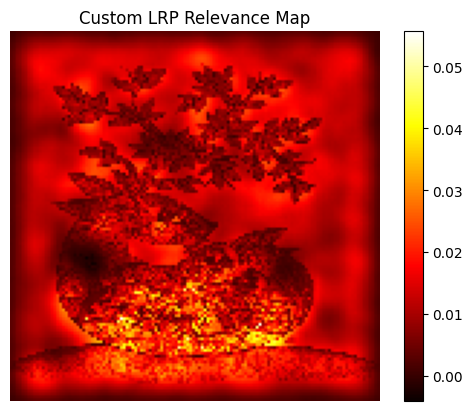

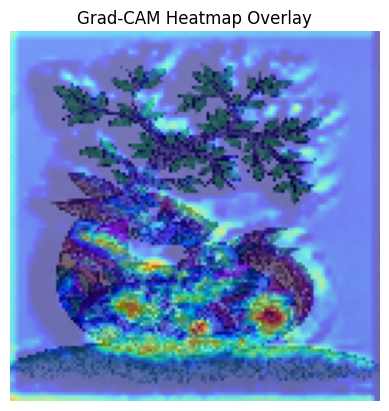

In [ ]:
from tensorflow.keras.preprocessing import image

# --- SETTINGS ---
custom_image_filename = "WhatsApp Image 2025-05-29 at 10.51.26_862619b4.jpg"
search_dirs = [red_folder, green_folder, blue_folder]
img_height, img_width = 128, 128

# --- FIND IMAGE PATH ---
sample_image_path = None
for folder in search_dirs:
    potential_path = os.path.join(folder, custom_image_filename)
    if os.path.exists(potential_path):
        sample_image_path = potential_path
        break

if sample_image_path is None:
    raise FileNotFoundError(f"{custom_image_filename} not found in Red/Green/Blue folders.")
print(f"Using image: {sample_image_path}")

# --- LOAD AND PREPROCESS IMAGE ---
img_custom = image.load_img(sample_image_path, target_size=(img_height, img_width))
img_array_custom = image.img_to_array(img_custom) / 255.0
img_tensor_custom = tf.expand_dims(img_array_custom, axis=0)
img_tensor_custom = tf.cast(img_tensor_custom, tf.float32)

# -------------------------------
# Layer-wise Relevance Propagation (LRP)
# -------------------------------
def lrp(model, input_image, eps=1e-5):
    activations = [input_image]
    x = input_image
    for layer in model.layers:
        x = layer(x)
        activations.append(x)

    relevance = activations[-1].numpy()
    target_class = np.argmax(relevance[0])
    one_hot = np.zeros_like(relevance)
    one_hot[0, target_class] = relevance[0, target_class]
    relevance = tf.convert_to_tensor(one_hot, dtype=tf.float32)

    for i in reversed(range(len(model.layers))):
        layer = model.layers[i]
        input_activation = activations[i]
        output_activation = activations[i + 1]

        if isinstance(layer, Dense):
            W = tf.maximum(layer.get_weights()[0], 0.0)
            z = tf.matmul(input_activation, W) + eps
            s = relevance / z
            c = tf.matmul(s, tf.transpose(W))
            relevance = input_activation * c

        elif isinstance(layer, Conv2D):
            W = tf.maximum(layer.get_weights()[0], 0.0)
            strides = [1] + list(layer.strides) + [1]
            padding = layer.padding.upper()
            z = tf.nn.conv2d(input_activation, W, strides=strides, padding=padding) + eps
            if relevance.shape[1:3] != z.shape[1:3]:
                relevance = tf.image.resize(relevance, size=tf.shape(z)[1:3], method='bilinear')
            s = relevance / z
            input_shape = tf.shape(input_activation)
            c = tf.raw_ops.Conv2DBackpropInput(
                input_sizes=input_shape,
                filter=W,
                out_backprop=s,
                strides=strides,
                padding=padding,
                data_format='NHWC'
            )
            relevance = input_activation * c

        elif isinstance(layer, AveragePooling2D):
            input_shape = tf.shape(input_activation)[1:3]
            pool_size = layer.pool_size
            strides = layer.strides
            kernel_h, kernel_w = pool_size
            relevance_upsampled = tf.image.resize(relevance, size=input_shape, method='nearest')
            relevance = relevance_upsampled * (kernel_h * kernel_w)

        elif isinstance(layer, Flatten):
            relevance = tf.reshape(relevance, tf.shape(input_activation))

    return relevance.numpy()

# --- Run and Plot LRP ---
try:
    relevance_map = lrp(best_model, img_tensor_custom)
    plt.imshow(np.sum(relevance_map[0], axis=-1), cmap='hot')
    plt.title("Custom LRP Relevance Map")
    plt.axis('off')
    plt.colorbar()
    plt.show()
except Exception as e:
    print(f"Error in LRP: {e}")

# -------------------------------
# Grad-CAM
# -------------------------------
def make_gradcam_heatmap(img_tensor, model):
    with tf.GradientTape() as tape:
        last_conv_output, predictions = model(img_tensor, training=False)
        tape.watch(last_conv_output)
        pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = last_conv_output[0]
    heatmap = tf.linalg.matvec(conv_outputs, pooled_grads)
    heatmap = tf.nn.relu(heatmap)
    max_val = tf.reduce_max(heatmap)
    heatmap = tf.cond(max_val > 0, lambda: heatmap / max_val, lambda: heatmap)
    return heatmap.numpy()

# --- Create grad_model ---
last_conv_layer_name = None
for layer in reversed(best_model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break

input_layer = tf.keras.Input(shape=best_model.input_shape[1:])
x = input_layer
last_conv_output = None
for layer in best_model.layers:
    x = layer(x)
    if layer.name == last_conv_layer_name:
        last_conv_output = x

grad_model = tf.keras.models.Model(inputs=input_layer, outputs=[last_conv_output, x])

# --- Generate and Plot Grad-CAM ---
try:
    heatmap = make_gradcam_heatmap(img_tensor_custom, grad_model)
    heatmap_resized = tf.image.resize(heatmap[..., tf.newaxis], size=(img_height, img_width))
    heatmap_resized = tf.squeeze(heatmap_resized)

    plt.imshow(img_custom)
    plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
    plt.axis('off')
    plt.title("Grad-CAM Heatmap Overlay")
    plt.show()
except Exception as e:
    print(f"Error in Grad-CAM: {e}")


Using image: /content/drive/MyDrive/emotion detection_sorted_final_colors_lenet/Green/5448b687c52e026f6168b3b2c817d4b9.jpg


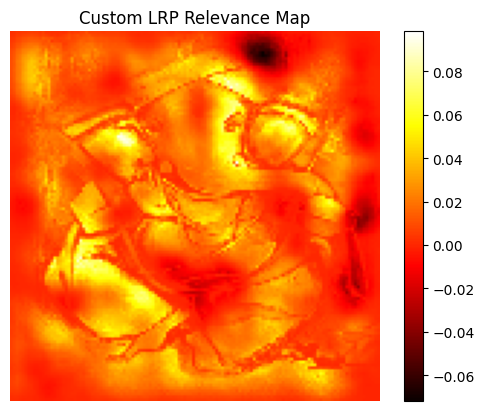

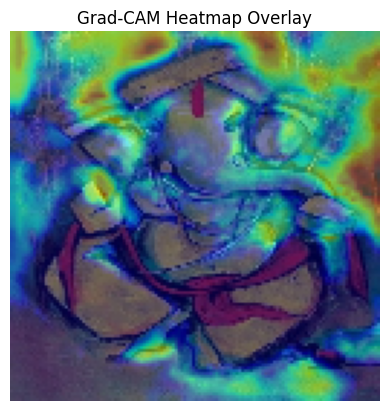

In [ ]:
from tensorflow.keras.preprocessing import image

# --- SETTINGS ---
custom_image_filename = "5448b687c52e026f6168b3b2c817d4b9.jpg"
search_dirs = [red_folder, green_folder, blue_folder]
img_height, img_width = 128, 128

# --- FIND IMAGE PATH ---
sample_image_path = None
for folder in search_dirs:
    potential_path = os.path.join(folder, custom_image_filename)
    if os.path.exists(potential_path):
        sample_image_path = potential_path
        break

if sample_image_path is None:
    raise FileNotFoundError(f"{custom_image_filename} not found in Red/Green/Blue folders.")
print(f"Using image: {sample_image_path}")

# --- LOAD AND PREPROCESS IMAGE ---
img_custom = image.load_img(sample_image_path, target_size=(img_height, img_width))
img_array_custom = image.img_to_array(img_custom) / 255.0
img_tensor_custom = tf.expand_dims(img_array_custom, axis=0)
img_tensor_custom = tf.cast(img_tensor_custom, tf.float32)

# -------------------------------
# Layer-wise Relevance Propagation (LRP)
# -------------------------------
def lrp(model, input_image, eps=1e-5):
    activations = [input_image]
    x = input_image
    for layer in model.layers:
        x = layer(x)
        activations.append(x)

    relevance = activations[-1].numpy()
    target_class = np.argmax(relevance[0])
    one_hot = np.zeros_like(relevance)
    one_hot[0, target_class] = relevance[0, target_class]
    relevance = tf.convert_to_tensor(one_hot, dtype=tf.float32)

    for i in reversed(range(len(model.layers))):
        layer = model.layers[i]
        input_activation = activations[i]
        output_activation = activations[i + 1]

        if isinstance(layer, Dense):
            W = tf.maximum(layer.get_weights()[0], 0.0)
            z = tf.matmul(input_activation, W) + eps
            s = relevance / z
            c = tf.matmul(s, tf.transpose(W))
            relevance = input_activation * c

        elif isinstance(layer, Conv2D):
            W = tf.maximum(layer.get_weights()[0], 0.0)
            strides = [1] + list(layer.strides) + [1]
            padding = layer.padding.upper()
            z = tf.nn.conv2d(input_activation, W, strides=strides, padding=padding) + eps
            if relevance.shape[1:3] != z.shape[1:3]:
                relevance = tf.image.resize(relevance, size=tf.shape(z)[1:3], method='bilinear')
            s = relevance / z
            input_shape = tf.shape(input_activation)
            c = tf.raw_ops.Conv2DBackpropInput(
                input_sizes=input_shape,
                filter=W,
                out_backprop=s,
                strides=strides,
                padding=padding,
                data_format='NHWC'
            )
            relevance = input_activation * c

        elif isinstance(layer, AveragePooling2D):
            input_shape = tf.shape(input_activation)[1:3]
            pool_size = layer.pool_size
            strides = layer.strides
            kernel_h, kernel_w = pool_size
            relevance_upsampled = tf.image.resize(relevance, size=input_shape, method='nearest')
            relevance = relevance_upsampled * (kernel_h * kernel_w)

        elif isinstance(layer, Flatten):
            relevance = tf.reshape(relevance, tf.shape(input_activation))

    return relevance.numpy()

# --- Run and Plot LRP ---
try:
    relevance_map = lrp(best_model, img_tensor_custom)
    plt.imshow(np.sum(relevance_map[0], axis=-1), cmap='hot')
    plt.title("Custom LRP Relevance Map")
    plt.axis('off')
    plt.colorbar()
    plt.show()
except Exception as e:
    print(f"Error in LRP: {e}")

# -------------------------------
# Grad-CAM
# -------------------------------
def make_gradcam_heatmap(img_tensor, model):
    with tf.GradientTape() as tape:
        last_conv_output, predictions = model(img_tensor, training=False)
        tape.watch(last_conv_output)
        pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = last_conv_output[0]
    heatmap = tf.linalg.matvec(conv_outputs, pooled_grads)
    heatmap = tf.nn.relu(heatmap)
    max_val = tf.reduce_max(heatmap)
    heatmap = tf.cond(max_val > 0, lambda: heatmap / max_val, lambda: heatmap)
    return heatmap.numpy()

# --- Create grad_model ---
last_conv_layer_name = None
for layer in reversed(best_model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break

input_layer = tf.keras.Input(shape=best_model.input_shape[1:])
x = input_layer
last_conv_output = None
for layer in best_model.layers:
    x = layer(x)
    if layer.name == last_conv_layer_name:
        last_conv_output = x

grad_model = tf.keras.models.Model(inputs=input_layer, outputs=[last_conv_output, x])

# --- Generate and Plot Grad-CAM ---
try:
    heatmap = make_gradcam_heatmap(img_tensor_custom, grad_model)
    heatmap_resized = tf.image.resize(heatmap[..., tf.newaxis], size=(img_height, img_width))
    heatmap_resized = tf.squeeze(heatmap_resized)

    plt.imshow(img_custom)
    plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
    plt.axis('off')
    plt.title("Grad-CAM Heatmap Overlay")
    plt.show()
except Exception as e:
    print(f"Error in Grad-CAM: {e}")


Using image: /content/drive/MyDrive/emotion detection_sorted_final_colors_lenet/Red/WhatsApp Image 2025-05-29 at 11.01.30_7a566db4.jpg


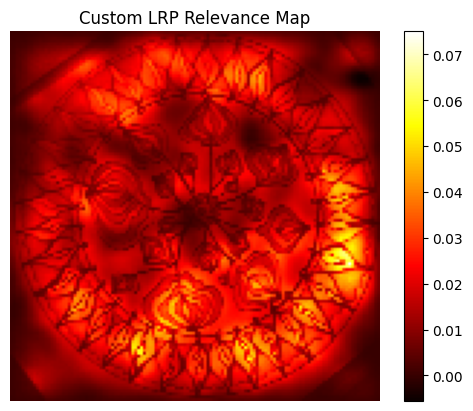

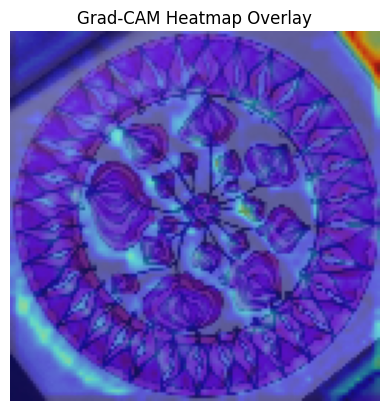

In [ ]:
from tensorflow.keras.preprocessing import image

# --- SETTINGS ---
custom_image_filename = "WhatsApp Image 2025-05-29 at 11.01.30_7a566db4.jpg"
search_dirs = [red_folder, green_folder, blue_folder]
img_height, img_width = 128, 128

# --- FIND IMAGE PATH ---
sample_image_path = None
for folder in search_dirs:
    potential_path = os.path.join(folder, custom_image_filename)
    if os.path.exists(potential_path):
        sample_image_path = potential_path
        break

if sample_image_path is None:
    raise FileNotFoundError(f"{custom_image_filename} not found in Red/Green/Blue folders.")
print(f"Using image: {sample_image_path}")

# --- LOAD AND PREPROCESS IMAGE ---
img_custom = image.load_img(sample_image_path, target_size=(img_height, img_width))
img_array_custom = image.img_to_array(img_custom) / 255.0
img_tensor_custom = tf.expand_dims(img_array_custom, axis=0)
img_tensor_custom = tf.cast(img_tensor_custom, tf.float32)

# -------------------------------
# Layer-wise Relevance Propagation (LRP)
# -------------------------------
def lrp(model, input_image, eps=1e-5):
    activations = [input_image]
    x = input_image
    for layer in model.layers:
        x = layer(x)
        activations.append(x)

    relevance = activations[-1].numpy()
    target_class = np.argmax(relevance[0])
    one_hot = np.zeros_like(relevance)
    one_hot[0, target_class] = relevance[0, target_class]
    relevance = tf.convert_to_tensor(one_hot, dtype=tf.float32)

    for i in reversed(range(len(model.layers))):
        layer = model.layers[i]
        input_activation = activations[i]
        output_activation = activations[i + 1]

        if isinstance(layer, Dense):
            W = tf.maximum(layer.get_weights()[0], 0.0)
            z = tf.matmul(input_activation, W) + eps
            s = relevance / z
            c = tf.matmul(s, tf.transpose(W))
            relevance = input_activation * c

        elif isinstance(layer, Conv2D):
            W = tf.maximum(layer.get_weights()[0], 0.0)
            strides = [1] + list(layer.strides) + [1]
            padding = layer.padding.upper()
            z = tf.nn.conv2d(input_activation, W, strides=strides, padding=padding) + eps
            if relevance.shape[1:3] != z.shape[1:3]:
                relevance = tf.image.resize(relevance, size=tf.shape(z)[1:3], method='bilinear')
            s = relevance / z
            input_shape = tf.shape(input_activation)
            c = tf.raw_ops.Conv2DBackpropInput(
                input_sizes=input_shape,
                filter=W,
                out_backprop=s,
                strides=strides,
                padding=padding,
                data_format='NHWC'
            )
            relevance = input_activation * c

        elif isinstance(layer, AveragePooling2D):
            input_shape = tf.shape(input_activation)[1:3]
            pool_size = layer.pool_size
            strides = layer.strides
            kernel_h, kernel_w = pool_size
            relevance_upsampled = tf.image.resize(relevance, size=input_shape, method='nearest')
            relevance = relevance_upsampled * (kernel_h * kernel_w)

        elif isinstance(layer, Flatten):
            relevance = tf.reshape(relevance, tf.shape(input_activation))

    return relevance.numpy()

# --- Run and Plot LRP ---
try:
    relevance_map = lrp(best_model, img_tensor_custom)
    plt.imshow(np.sum(relevance_map[0], axis=-1), cmap='hot')
    plt.title("Custom LRP Relevance Map")
    plt.axis('off')
    plt.colorbar()
    plt.show()
except Exception as e:
    print(f"Error in LRP: {e}")

# -------------------------------
# Grad-CAM
# -------------------------------
def make_gradcam_heatmap(img_tensor, model):
    with tf.GradientTape() as tape:
        last_conv_output, predictions = model(img_tensor, training=False)
        tape.watch(last_conv_output)
        pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = last_conv_output[0]
    heatmap = tf.linalg.matvec(conv_outputs, pooled_grads)
    heatmap = tf.nn.relu(heatmap)
    max_val = tf.reduce_max(heatmap)
    heatmap = tf.cond(max_val > 0, lambda: heatmap / max_val, lambda: heatmap)
    return heatmap.numpy()

# --- Create grad_model ---
last_conv_layer_name = None
for layer in reversed(best_model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break

input_layer = tf.keras.Input(shape=best_model.input_shape[1:])
x = input_layer
last_conv_output = None
for layer in best_model.layers:
    x = layer(x)
    if layer.name == last_conv_layer_name:
        last_conv_output = x

grad_model = tf.keras.models.Model(inputs=input_layer, outputs=[last_conv_output, x])

# --- Generate and Plot Grad-CAM ---
try:
    heatmap = make_gradcam_heatmap(img_tensor_custom, grad_model)
    heatmap_resized = tf.image.resize(heatmap[..., tf.newaxis], size=(img_height, img_width))
    heatmap_resized = tf.squeeze(heatmap_resized)

    plt.imshow(img_custom)
    plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
    plt.axis('off')
    plt.title("Grad-CAM Heatmap Overlay")
    plt.show()
except Exception as e:
    print(f"Error in Grad-CAM: {e}")


Using image: /content/drive/MyDrive/emotion detection_sorted_final_colors_lenet/Red/WhatsApp Image 2025-05-29 at 10.51.29_d022ddc3.jpg


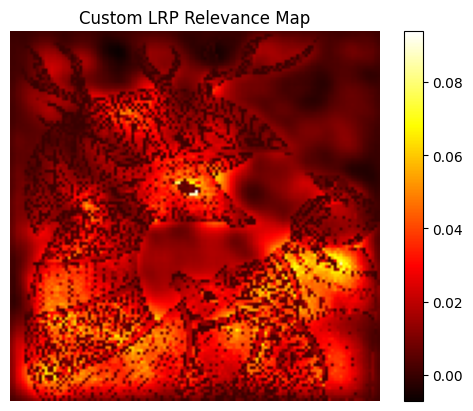

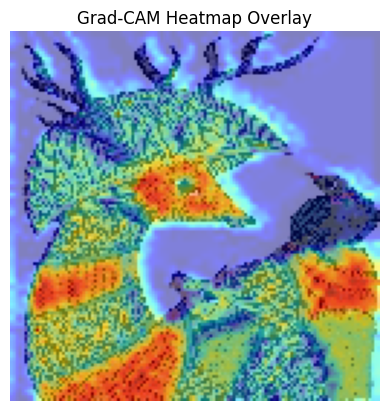

In [ ]:
from tensorflow.keras.preprocessing import image

# --- SETTINGS ---
custom_image_filename = "WhatsApp Image 2025-05-29 at 10.51.29_d022ddc3.jpg"
search_dirs = [red_folder, green_folder, blue_folder]
img_height, img_width = 128, 128

# --- FIND IMAGE PATH ---
sample_image_path = None
for folder in search_dirs:
    potential_path = os.path.join(folder, custom_image_filename)
    if os.path.exists(potential_path):
        sample_image_path = potential_path
        break

if sample_image_path is None:
    raise FileNotFoundError(f"{custom_image_filename} not found in Red/Green/Blue folders.")
print(f"Using image: {sample_image_path}")

# --- LOAD AND PREPROCESS IMAGE ---
img_custom = image.load_img(sample_image_path, target_size=(img_height, img_width))
img_array_custom = image.img_to_array(img_custom) / 255.0
img_tensor_custom = tf.expand_dims(img_array_custom, axis=0)
img_tensor_custom = tf.cast(img_tensor_custom, tf.float32)

# -------------------------------
# Layer-wise Relevance Propagation (LRP)
# -------------------------------
def lrp(model, input_image, eps=1e-5):
    activations = [input_image]
    x = input_image
    for layer in model.layers:
        x = layer(x)
        activations.append(x)

    relevance = activations[-1].numpy()
    target_class = np.argmax(relevance[0])
    one_hot = np.zeros_like(relevance)
    one_hot[0, target_class] = relevance[0, target_class]
    relevance = tf.convert_to_tensor(one_hot, dtype=tf.float32)

    for i in reversed(range(len(model.layers))):
        layer = model.layers[i]
        input_activation = activations[i]
        output_activation = activations[i + 1]

        if isinstance(layer, Dense):
            W = tf.maximum(layer.get_weights()[0], 0.0)
            z = tf.matmul(input_activation, W) + eps
            s = relevance / z
            c = tf.matmul(s, tf.transpose(W))
            relevance = input_activation * c

        elif isinstance(layer, Conv2D):
            W = tf.maximum(layer.get_weights()[0], 0.0)
            strides = [1] + list(layer.strides) + [1]
            padding = layer.padding.upper()
            z = tf.nn.conv2d(input_activation, W, strides=strides, padding=padding) + eps
            if relevance.shape[1:3] != z.shape[1:3]:
                relevance = tf.image.resize(relevance, size=tf.shape(z)[1:3], method='bilinear')
            s = relevance / z
            input_shape = tf.shape(input_activation)
            c = tf.raw_ops.Conv2DBackpropInput(
                input_sizes=input_shape,
                filter=W,
                out_backprop=s,
                strides=strides,
                padding=padding,
                data_format='NHWC'
            )
            relevance = input_activation * c

        elif isinstance(layer, AveragePooling2D):
            input_shape = tf.shape(input_activation)[1:3]
            pool_size = layer.pool_size
            strides = layer.strides
            kernel_h, kernel_w = pool_size
            relevance_upsampled = tf.image.resize(relevance, size=input_shape, method='nearest')
            relevance = relevance_upsampled * (kernel_h * kernel_w)

        elif isinstance(layer, Flatten):
            relevance = tf.reshape(relevance, tf.shape(input_activation))

    return relevance.numpy()

# --- Run and Plot LRP ---
try:
    relevance_map = lrp(best_model, img_tensor_custom)
    plt.imshow(np.sum(relevance_map[0], axis=-1), cmap='hot')
    plt.title("Custom LRP Relevance Map")
    plt.axis('off')
    plt.colorbar()
    plt.show()
except Exception as e:
    print(f"Error in LRP: {e}")

# -------------------------------
# Grad-CAM
# -------------------------------
def make_gradcam_heatmap(img_tensor, model):
    with tf.GradientTape() as tape:
        last_conv_output, predictions = model(img_tensor, training=False)
        tape.watch(last_conv_output)
        pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = last_conv_output[0]
    heatmap = tf.linalg.matvec(conv_outputs, pooled_grads)
    heatmap = tf.nn.relu(heatmap)
    max_val = tf.reduce_max(heatmap)
    heatmap = tf.cond(max_val > 0, lambda: heatmap / max_val, lambda: heatmap)
    return heatmap.numpy()

# --- Create grad_model ---
last_conv_layer_name = None
for layer in reversed(best_model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break

input_layer = tf.keras.Input(shape=best_model.input_shape[1:])
x = input_layer
last_conv_output = None
for layer in best_model.layers:
    x = layer(x)
    if layer.name == last_conv_layer_name:
        last_conv_output = x

grad_model = tf.keras.models.Model(inputs=input_layer, outputs=[last_conv_output, x])

# --- Generate and Plot Grad-CAM ---
try:
    heatmap = make_gradcam_heatmap(img_tensor_custom, grad_model)
    heatmap_resized = tf.image.resize(heatmap[..., tf.newaxis], size=(img_height, img_width))
    heatmap_resized = tf.squeeze(heatmap_resized)

    plt.imshow(img_custom)
    plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
    plt.axis('off')
    plt.title("Grad-CAM Heatmap Overlay")
    plt.show()
except Exception as e:
    print(f"Error in Grad-CAM: {e}")


In [ ]:
WhatsApp Image 2025-05-29 at 10.51.22_4a90516d.jpg

Using image: /content/drive/MyDrive/emotion detection_sorted_final_colors_lenet/Red/WhatsApp Image 2025-05-29 at 10.51.22_4a90516d.jpg


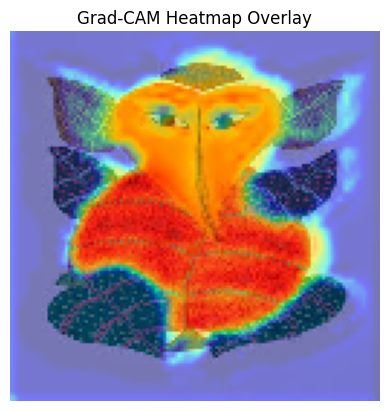

In [ ]:
from tensorflow.keras.preprocessing import image

# --- SETTINGS ---
custom_image_filename = "WhatsApp Image 2025-05-29 at 10.51.22_4a90516d.jpg"
search_dirs = [red_folder, green_folder, blue_folder]
img_height, img_width = 128, 128

# --- FIND IMAGE PATH ---
sample_image_path = None
for folder in search_dirs:
    potential_path = os.path.join(folder, custom_image_filename)
    if os.path.exists(potential_path):
        sample_image_path = potential_path
        break

if sample_image_path is None:
    raise FileNotFoundError(f"{custom_image_filename} not found in Red/Green/Blue folders.")
print(f"Using image: {sample_image_path}")

# --- LOAD AND PREPROCESS IMAGE ---
img_custom = image.load_img(sample_image_path, target_size=(img_height, img_width))
img_array_custom = image.img_to_array(img_custom) / 255.0
img_tensor_custom = tf.expand_dims(img_array_custom, axis=0)
img_tensor_custom = tf.cast(img_tensor_custom, tf.float32)

# -------------------------------
# Layer-wise Relevance Propagation (LRP)
# -------------------------------
def lrp(model, input_image, eps=1e-5):
    activations = [input_image]
    x = input_image
    for layer in model.layers:
        x = layer(x)
        activations.append(x)

    relevance = activations[-1].numpy()
    target_class = np.argmax(relevance[0])
    one_hot = np.zeros_like(relevance)
    one_hot[0, target_class] = relevance[0, target_class]
    relevance = tf.convert_to_tensor(one_hot, dtype=tf.float32)

    for i in reversed(range(len(model.layers))):
        layer = model.layers[i]
        input_activation = activations[i]
        output_activation = activations[i + 1]

        if isinstance(layer, Dense):
            W = tf.maximum(layer.get_weights()[0], 0.0)
            z = tf.matmul(input_activation, W) + eps
            s = relevance / z
            c = tf.matmul(s, tf.transpose(W))
            relevance = input_activation * c

        elif isinstance(layer, Conv2D):
            W = tf.maximum(layer.get_weights()[0], 0.0)
            strides = [1] + list(layer.strides) + [1]
            padding = layer.padding.upper()
            z = tf.nn.conv2d(input_activation, W, strides=strides, padding=padding) + eps
            if relevance.shape[1:3] != z.shape[1:3]:
                relevance = tf.image.resize(relevance, size=tf.shape(z)[1:3], method='bilinear')
            s = relevance / z
            input_shape = tf.shape(input_activation)
            c = tf.raw_ops.Conv2DBackpropInput(
                input_sizes=input_shape,
                filter=W,
                out_backprop=s,
                strides=strides,
                padding=padding,
                data_format='NHWC'
            )
            relevance = input_activation * c

        elif isinstance(layer, AveragePooling2D):
            input_shape = tf.shape(input_activation)[1:3]
            pool_size = layer.pool_size
            strides = layer.strides
            kernel_h, kernel_w = pool_size
            relevance_upsampled = tf.image.resize(relevance, size=input_shape, method='nearest')
            relevance = relevance_upsampled * (kernel_h * kernel_w)

        elif isinstance(layer, Flatten):
            relevance = tf.reshape(relevance, tf.shape(input_activation))

    return relevance.numpy()

# --- Run and Plot LRP ---
try:
    relevance_map = lrp(best_model, img_tensor_custom)
    plt.imshow(np.sum(relevance_map[0], axis=-1), cmap='hot')
    plt.title("Custom LRP Relevance Map")
    plt.axis('off')
    plt.colorbar()
    plt.show()
except Exception as e:
    print(f"Error in LRP: {e}")

# -------------------------------
# Grad-CAM
# -------------------------------
def make_gradcam_heatmap(img_tensor, model):
    with tf.GradientTape() as tape:
        last_conv_output, predictions = model(img_tensor, training=False)
        tape.watch(last_conv_output)
        pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = last_conv_output[0]
    heatmap = tf.linalg.matvec(conv_outputs, pooled_grads)
    heatmap = tf.nn.relu(heatmap)
    max_val = tf.reduce_max(heatmap)
    heatmap = tf.cond(max_val > 0, lambda: heatmap / max_val, lambda: heatmap)
    return heatmap.numpy()

# --- Create grad_model ---
last_conv_layer_name = None
for layer in reversed(best_model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break

input_layer = tf.keras.Input(shape=best_model.input_shape[1:])
x = input_layer
last_conv_output = None
for layer in best_model.layers:
    x = layer(x)
    if layer.name == last_conv_layer_name:
        last_conv_output = x

grad_model = tf.keras.models.Model(inputs=input_layer, outputs=[last_conv_output, x])

# --- Generate and Plot Grad-CAM ---
try:
    heatmap = make_gradcam_heatmap(img_tensor_custom, grad_model)
    heatmap_resized = tf.image.resize(heatmap[..., tf.newaxis], size=(img_height, img_width))
    heatmap_resized = tf.squeeze(heatmap_resized)

    plt.imshow(img_custom)
    plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
    plt.axis('off')
    plt.title("Grad-CAM Heatmap Overlay")
    plt.show()
except Exception as e:
    print(f"Error in Grad-CAM: {e}")


Using image: /content/drive/MyDrive/emotion detection_sorted_final_colors_lenet/Green/64d77bee47f97d1f6d97d0bc8b051035 (1).jpg


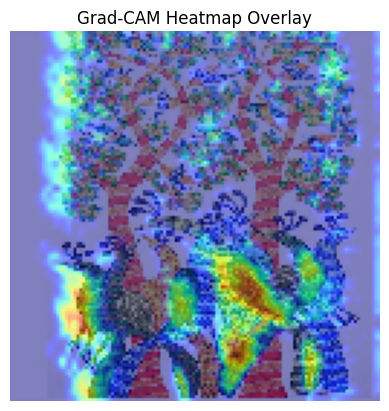

In [ ]:
from tensorflow.keras.preprocessing import image

# --- SETTINGS ---
custom_image_filename = "64d77bee47f97d1f6d97d0bc8b051035 (1).jpg"
search_dirs = [red_folder, green_folder, blue_folder]
img_height, img_width = 128, 128

# --- FIND IMAGE PATH ---
sample_image_path = None
for folder in search_dirs:
    potential_path = os.path.join(folder, custom_image_filename)
    if os.path.exists(potential_path):
        sample_image_path = potential_path
        break

if sample_image_path is None:
    raise FileNotFoundError(f"{custom_image_filename} not found in Red/Green/Blue folders.")
print(f"Using image: {sample_image_path}")

# --- LOAD AND PREPROCESS IMAGE ---
img_custom = image.load_img(sample_image_path, target_size=(img_height, img_width))
img_array_custom = image.img_to_array(img_custom) / 255.0
img_tensor_custom = tf.expand_dims(img_array_custom, axis=0)
img_tensor_custom = tf.cast(img_tensor_custom, tf.float32)

# -------------------------------
# Layer-wise Relevance Propagation (LRP)
# -------------------------------
def lrp(model, input_image, eps=1e-5):
    activations = [input_image]
    x = input_image
    for layer in model.layers:
        x = layer(x)
        activations.append(x)

    relevance = activations[-1].numpy()
    target_class = np.argmax(relevance[0])
    one_hot = np.zeros_like(relevance)
    one_hot[0, target_class] = relevance[0, target_class]
    relevance = tf.convert_to_tensor(one_hot, dtype=tf.float32)

    for i in reversed(range(len(model.layers))):
        layer = model.layers[i]
        input_activation = activations[i]
        output_activation = activations[i + 1]

        if isinstance(layer, Dense):
            W = tf.maximum(layer.get_weights()[0], 0.0)
            z = tf.matmul(input_activation, W) + eps
            s = relevance / z
            c = tf.matmul(s, tf.transpose(W))
            relevance = input_activation * c

        elif isinstance(layer, Conv2D):
            W = tf.maximum(layer.get_weights()[0], 0.0)
            strides = [1] + list(layer.strides) + [1]
            padding = layer.padding.upper()
            z = tf.nn.conv2d(input_activation, W, strides=strides, padding=padding) + eps
            if relevance.shape[1:3] != z.shape[1:3]:
                relevance = tf.image.resize(relevance, size=tf.shape(z)[1:3], method='bilinear')
            s = relevance / z
            input_shape = tf.shape(input_activation)
            c = tf.raw_ops.Conv2DBackpropInput(
                input_sizes=input_shape,
                filter=W,
                out_backprop=s,
                strides=strides,
                padding=padding,
                data_format='NHWC'
            )
            relevance = input_activation * c

        elif isinstance(layer, AveragePooling2D):
            input_shape = tf.shape(input_activation)[1:3]
            pool_size = layer.pool_size
            strides = layer.strides
            kernel_h, kernel_w = pool_size
            relevance_upsampled = tf.image.resize(relevance, size=input_shape, method='nearest')
            relevance = relevance_upsampled * (kernel_h * kernel_w)

        elif isinstance(layer, Flatten):
            relevance = tf.reshape(relevance, tf.shape(input_activation))

    return relevance.numpy()

# --- Run and Plot LRP ---
try:
    relevance_map = lrp(best_model, img_tensor_custom)
    plt.imshow(np.sum(relevance_map[0], axis=-1), cmap='hot')
    plt.title("Custom LRP Relevance Map")
    plt.axis('off')
    plt.colorbar()
    plt.show()
except Exception as e:
    print(f"Error in LRP: {e}")

# -------------------------------
# Grad-CAM
# -------------------------------
def make_gradcam_heatmap(img_tensor, model):
    with tf.GradientTape() as tape:
        last_conv_output, predictions = model(img_tensor, training=False)
        tape.watch(last_conv_output)
        pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = last_conv_output[0]
    heatmap = tf.linalg.matvec(conv_outputs, pooled_grads)
    heatmap = tf.nn.relu(heatmap)
    max_val = tf.reduce_max(heatmap)
    heatmap = tf.cond(max_val > 0, lambda: heatmap / max_val, lambda: heatmap)
    return heatmap.numpy()

# --- Create grad_model ---
last_conv_layer_name = None
for layer in reversed(best_model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break

input_layer = tf.keras.Input(shape=best_model.input_shape[1:])
x = input_layer
last_conv_output = None
for layer in best_model.layers:
    x = layer(x)
    if layer.name == last_conv_layer_name:
        last_conv_output = x

grad_model = tf.keras.models.Model(inputs=input_layer, outputs=[last_conv_output, x])

# --- Generate and Plot Grad-CAM ---
try:
    heatmap = make_gradcam_heatmap(img_tensor_custom, grad_model)
    heatmap_resized = tf.image.resize(heatmap[..., tf.newaxis], size=(img_height, img_width))
    heatmap_resized = tf.squeeze(heatmap_resized)

    plt.imshow(img_custom)
    plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
    plt.axis('off')
    plt.title("Grad-CAM Heatmap Overlay")
    plt.show()
except Exception as e:
    print(f"Error in Grad-CAM: {e}")


Using image: /content/drive/MyDrive/emotion detection_sorted_final_colors_lenet/Green/Mandala_Art_colored_60.jpg


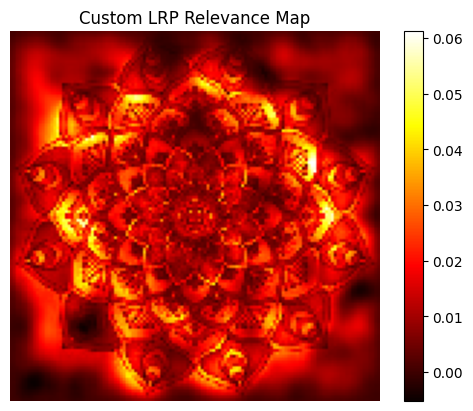

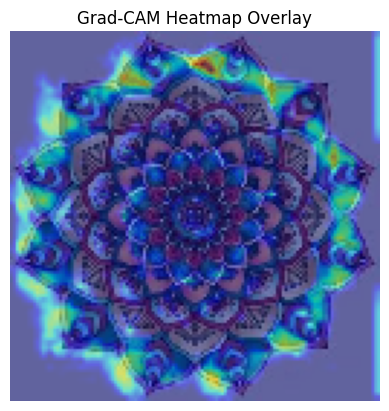

In [ ]:

from tensorflow.keras.preprocessing import image

# --- SETTINGS ---
custom_image_filename = "Mandala_Art_colored_60.jpg"
search_dirs = [red_folder, green_folder, blue_folder]
img_height, img_width = 128, 128

# --- FIND IMAGE PATH ---
sample_image_path = None
for folder in search_dirs:
    potential_path = os.path.join(folder, custom_image_filename)
    if os.path.exists(potential_path):
        sample_image_path = potential_path
        break

if sample_image_path is None:
    raise FileNotFoundError(f"{custom_image_filename} not found in Red/Green/Blue folders.")
print(f"Using image: {sample_image_path}")

# --- LOAD AND PREPROCESS IMAGE ---
img_custom = image.load_img(sample_image_path, target_size=(img_height, img_width))
img_array_custom = image.img_to_array(img_custom) / 255.0
img_tensor_custom = tf.expand_dims(img_array_custom, axis=0)
img_tensor_custom = tf.cast(img_tensor_custom, tf.float32)

# -------------------------------
# Layer-wise Relevance Propagation (LRP)
# -------------------------------
def lrp(model, input_image, eps=1e-5):
    activations = [input_image]
    x = input_image
    for layer in model.layers:
        x = layer(x)
        activations.append(x)

    relevance = activations[-1].numpy()
    target_class = np.argmax(relevance[0])
    one_hot = np.zeros_like(relevance)
    one_hot[0, target_class] = relevance[0, target_class]
    relevance = tf.convert_to_tensor(one_hot, dtype=tf.float32)

    for i in reversed(range(len(model.layers))):
        layer = model.layers[i]
        input_activation = activations[i]
        output_activation = activations[i + 1]

        if isinstance(layer, Dense):
            W = tf.maximum(layer.get_weights()[0], 0.0)
            z = tf.matmul(input_activation, W) + eps
            s = relevance / z
            c = tf.matmul(s, tf.transpose(W))
            relevance = input_activation * c

        elif isinstance(layer, Conv2D):
            W = tf.maximum(layer.get_weights()[0], 0.0)
            strides = [1] + list(layer.strides) + [1]
            padding = layer.padding.upper()
            z = tf.nn.conv2d(input_activation, W, strides=strides, padding=padding) + eps
            if relevance.shape[1:3] != z.shape[1:3]:
                relevance = tf.image.resize(relevance, size=tf.shape(z)[1:3], method='bilinear')
            s = relevance / z
            input_shape = tf.shape(input_activation)
            c = tf.raw_ops.Conv2DBackpropInput(
                input_sizes=input_shape,
                filter=W,
                out_backprop=s,
                strides=strides,
                padding=padding,
                data_format='NHWC'
            )
            relevance = input_activation * c

        elif isinstance(layer, AveragePooling2D):
            input_shape = tf.shape(input_activation)[1:3]
            pool_size = layer.pool_size
            strides = layer.strides
            kernel_h, kernel_w = pool_size
            relevance_upsampled = tf.image.resize(relevance, size=input_shape, method='nearest')
            relevance = relevance_upsampled * (kernel_h * kernel_w)

        elif isinstance(layer, Flatten):
            relevance = tf.reshape(relevance, tf.shape(input_activation))

    return relevance.numpy()

# --- Run and Plot LRP ---
try:
    relevance_map = lrp(best_model, img_tensor_custom)
    plt.imshow(np.sum(relevance_map[0], axis=-1), cmap='hot')
    plt.title("Custom LRP Relevance Map")
    plt.axis('off')
    plt.colorbar()
    plt.show()
except Exception as e:
    print(f"Error in LRP: {e}")

# -------------------------------
# Grad-CAM
# -------------------------------
def make_gradcam_heatmap(img_tensor, model):
    with tf.GradientTape() as tape:
        last_conv_output, predictions = model(img_tensor, training=False)
        tape.watch(last_conv_output)
        pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = last_conv_output[0]
    heatmap = tf.linalg.matvec(conv_outputs, pooled_grads)
    heatmap = tf.nn.relu(heatmap)
    max_val = tf.reduce_max(heatmap)
    heatmap = tf.cond(max_val > 0, lambda: heatmap / max_val, lambda: heatmap)
    return heatmap.numpy()

# --- Create grad_model ---
last_conv_layer_name = None
for layer in reversed(best_model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break

input_layer = tf.keras.Input(shape=best_model.input_shape[1:])
x = input_layer
last_conv_output = None
for layer in best_model.layers:
    x = layer(x)
    if layer.name == last_conv_layer_name:
        last_conv_output = x

grad_model = tf.keras.models.Model(inputs=input_layer, outputs=[last_conv_output, x])

# --- Generate and Plot Grad-CAM ---
try:
    heatmap = make_gradcam_heatmap(img_tensor_custom, grad_model)
    heatmap_resized = tf.image.resize(heatmap[..., tf.newaxis], size=(img_height, img_width))
    heatmap_resized = tf.squeeze(heatmap_resized)

    plt.imshow(img_custom)
    plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
    plt.axis('off')
    plt.title("Grad-CAM Heatmap Overlay")
    plt.show()
except Exception as e:
    print(f"Error in Grad-CAM: {e}")


In [ ]:
# Install necessary packages with specific versions and order
# Uninstall potentially conflicting versions first
!pip uninstall -y scikit-learn scipy numpy
# Install core libraries first, ensuring compatibility
!pip install -q numpy==1.26.2
!pip install -q scipy==1.11.4
!pip install -q scikit-learn==1.3.2
!pip install -q -U keras-tuner

# Imports
import os
import shutil
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# Import scikit-learn modules *after* ensuring installation
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Paths
folder_path = "/content/drive/MyDrive/emotion detection/"
output_base = "/content/drive/MyDrive/emotion detection_sorted_final_colors_lenet"
os.makedirs(os.path.join(output_base, "Red"), exist_ok=True)
os.makedirs(os.path.join(output_base, "Green"), exist_ok=True)
os.makedirs(os.path.join(output_base, "Blue"), exist_ok=True)

# Dominant color detection
def get_dominant_color(pixels):
    r_total = np.sum(pixels[:, :, 0])
    g_total = np.sum(pixels[:, :, 1])
    b_total = np.sum(pixels[:, :, 2])
    max_color = max(r_total, g_total, b_total)
    return "Red" if max_color == r_total else "Green" if max_color == g_total else "Blue"

# Sort images
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
for image_file in image_files:
    try:
        img_path = os.path.join(folder_path, image_file)
        img = Image.open(img_path).convert("RGB")
        pixels = np.array(img)
        dominant_color = get_dominant_color(pixels)
        shutil.copy(img_path, os.path.join(output_base, dominant_color, image_file))
    except Exception as e:
        print(f"Error with {image_file}: {e}")

# Image generators
img_height, img_width = 128, 128
batch_size = 32
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width), batch_size=batch_size,
    class_mode='categorical', subset='training', shuffle=True, seed=42)
val_generator = datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width), batch_size=batch_size,
    class_mode='categorical', subset='validation', shuffle=False)

# Tunable LeNet
def build_lenet(hp):
    model = Sequential()
    model.add(Conv2D(filters=hp.Int('conv_1_filters', 4, 16, step=4),
                     kernel_size=(5, 5),
                     activation=hp.Choice('conv_1_activation', ['tanh', 'relu']),
                     padding='same',
                     input_shape=(img_height, img_width, 3)))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=2))
    model.add(Conv2D(filters=hp.Int('conv_2_filters', 8, 32, step=8),
                     kernel_size=(5, 5),
                     activation=hp.Choice('conv_2_activation', ['tanh', 'relu']),
                     padding='valid'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=2))
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_1_units', 60, 180, step=30),
                    activation=hp.Choice('dense_1_activation', ['tanh', 'relu'])))
    model.add(Dense(units=hp.Int('dense_2_units', 60, 120, step=20),
                    activation=hp.Choice('dense_2_activation', ['tanh', 'relu'])))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Tuning
tuner = kt.Hyperband(build_lenet, objective='val_accuracy', max_epochs=10,
                     factor=3, directory='lenet_tuner_dir', project_name='lenet_rgb_classification')
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
tuner.search(train_generator, validation_data=val_generator, epochs=10, callbacks=[stop_early])
best_hps = tuner.get_best_hyperparameters(1)[0]

# Train best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(train_generator, validation_data=val_generator, epochs=10)

# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------
# ROC Curve for Multiclass Classification
# ---------------------------------------
y_true = val_generator.classes
# Get class names directly from the generator's class_indices attribute
class_names = list(val_generator.class_indices.keys())
n_classes = len(class_names)

y_true_binarized = label_binarize(y_true, classes=list(range(n_classes)))

# Predict probabilities
y_pred_probs = best_model.predict(val_generator)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC
colors = ['red', 'green', 'blue'] # Assuming these correspond to the class indices
plt.figure()
for i, color in enumerate(colors):
    # Use class names in the legend
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
Found existing installation: scipy 1.11.4
Uninstalling scipy-1.11.4:
  Successfully uninstalled scipy-1.11.4
Found existing installation: numpy 1.26.2
Uninstalling numpy-1.26.2:
  Successfully uninstalled numpy-1.26.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
matplotlib-venn 1.1.2 requires scipy, which is not installed.
pymc 5.23.0 requires scipy>=1.4.1, which is not installed.
xgboost 2.1.4 requires scipy, which is not installed.
umap-learn 0.5.7 requires scikit-learn>=0.22, which is not installed.
umap-learn 0.5.7 requires scipy>=1.3.1, which is not installed.
stumpy 1.13.0 requires scipy>=1.10, which is not installed.
yellowbrick 1.5 requires scikit-learn>=1.0.0, which is not installed.
yellowbrick 1.5 requires scipy>=1.0.0, wh

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# Install necessary packages with specific versions for compatibility
# Uninstall potentially conflicting versions first
!pip uninstall -y tensorflow keras-tuner

# Install a known stable version of TensorFlow
!pip install -q tensorflow==2.15.0

# Install keras-tuner, which should now use the installed TensorFlow
!pip install -q -U keras-tuner

# Imports
import os
import shutil
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Import scikit-learn modules here if they are needed later.
# Their installation might be handled by Keras Tuner dependencies,
# or you might need to install them explicitly *after* TensorFlow if they are not.
# from sklearn.metrics import roc_curve, auc
# from sklearn.preprocessing import label_binarize


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from google.colab import drive
drive.mount('/content/drive')

# Paths
folder_path = "/content/drive/MyDrive/emotion detection/"
output_base = "/content/drive/MyDrive/emotion detection_sorted_final_colors_lenet"
red_folder = os.path.join(output_base, "Red")
green_folder = os.path.join(output_base, "Green")
blue_folder = os.path.join(output_base, "Blue")

os.makedirs(red_folder, exist_ok=True)
os.makedirs(green_folder, exist_ok=True)
os.makedirs(blue_folder, exist_ok=True)

# Get dominant color
def get_dominant_color(pixels):
    r_total = np.sum(pixels[:, :, 0])
    g_total = np.sum(pixels[:, :, 1])
    b_total = np.sum(pixels[:, :, 2])
    max_color = max(r_total, g_total, b_total)
    return "Red" if max_color == r_total else "Green" if max_color == g_total else "Blue"

# Sort images
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
for image_file in image_files:
    try:
        img_path = os.path.join(folder_path, image_file)
        img = Image.open(img_path).convert("RGB")
        pixels = np.array(img)
        dominant_color = get_dominant_color(pixels)
        dest = {"Red": red_folder, "Green": green_folder, "Blue": blue_folder}[dominant_color]
        shutil.copy(img_path, os.path.join(dest, image_file))
    except Exception as e:
        print(f"Error with {image_file}: {e}")
img_height, img_width = 128, 128
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', subset='training'
)
val_generator = train_datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', subset='validation'
)
def build_lenet(hp):
    model = Sequential()
    model.add(Conv2D(
        filters=hp.Int('conv_1_filters', min_value=4, max_value=16, step=4),
        kernel_size=(5, 5), activation=hp.Choice('conv_1_activation', ['tanh', 'relu']),
        padding='same', input_shape=(img_height, img_width, 3)))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=2))

    model.add(Conv2D(
        filters=hp.Int('conv_2_filters', min_value=8, max_value=32, step=8),
        kernel_size=(5, 5), activation=hp.Choice('conv_2_activation', ['tanh', 'relu']),
        padding='valid'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=2))

    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_1_units', min_value=60, max_value=180, step=30),
        activation=hp.Choice('dense_1_activation', ['tanh', 'relu'])))
    model.add(Dense(
        units=hp.Int('dense_2_units', min_value=60, max_value=120, step=20),
        activation=hp.Choice('dense_2_activation', ['tanh', 'relu'])))
    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model
tuner = kt.Hyperband(
    build_lenet,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='lenet_tuner_dir',
    project_name='lenet_rgb_classification'
)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
tuner.search(train_generator, validation_data=val_generator, epochs=10, callbacks=[stop_early])
best_hps = tuner.get_best_hyperparameters(1)[0]

print(f"""
Best Hyperparameters:
Conv1 filters: {best_hps.get('conv_1_filters')}
Conv2 filters: {best_hps.get('conv_2_filters')}
Dense1 units: {best_hps.get('dense_1_units')}
Dense2 units: {best_hps.get('dense_2_units')}
Learning rate: {best_hps.get('learning_rate')}
""")
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(train_generator, validation_data=val_generator, epochs=10)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------
# ROC Curve for Multiclass Classification
# ---------------------------------------
# Import scikit-learn here, after TensorFlow and Keras Tuner
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_true = val_generator.classes
# Get class names directly from the generator's class_indices attribute
class_names = list(val_generator.class_indices.keys())
n_classes = len(class_names)

y_true_binarized = label_binarize(y_true, classes=list(range(n_classes)))

# Predict probabilities
y_pred_probs = best_model.predict(val_generator)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC
colors = ['red', 'green', 'blue'] # Assuming these correspond to the class indices
plt.figure()
for i, color in enumerate(colors):
    # Use class names in the legend
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Found existing installation: tensorflow 2.14.1
Uninstalling tensorflow-2.14.1:
  Successfully uninstalled tensorflow-2.14.1
Found existing installation: keras-tuner 1.4.7
Uninstalling keras-tuner-1.4.7:
  Successfully uninstalled keras-tuner-1.4.7
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 26.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
innvestigate 2.1.2 requires tensorflow<2.15,>=2.6, but you have tensorflow 2.15.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.15.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorf

ImportError: /usr/local/lib/python3.11/dist-packages/tensorflow/python/_pywrap_tfe.so: undefined symbol: _ZN10tensorflow4swig16IsTensorProtocolEP7_object, version tensorflow

In [ ]:
!pip uninstall -y tensorflow keras-tuner

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
Found existing installation: keras-tuner 1.4.7
Uninstalling keras-tuner-1.4.7:
  Successfully uninstalled keras-tuner-1.4.7


In [ ]:
# Install necessary packages with specific versions for compatibility
# Uninstall potentially conflicting versions first
!pip uninstall -y tensorflow keras-tuner innvestigate tensorflow-decision-forests tensorflow-text tf-keras

# Install a known stable version of TensorFlow
!pip install -q tensorflow==2.15.0

# Install keras-tuner, which should now use the installed TensorFlow
!pip install -q -U keras-tuner

# Imports
import os
import shutil
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Import scikit-learn modules here if they are needed later.
# Their installation might be handled by Keras Tuner dependencies,
# or you might need to install them explicitly *after* TensorFlow if they are not.
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from google.colab import drive
drive.mount('/content/drive')

# Paths
folder_path = "/content/drive/MyDrive/emotion detection/"
output_base = "/content/drive/MyDrive/emotion detection_sorted_final_colors_lenet"
red_folder = os.path.join(output_base, "Red")
green_folder = os.path.join(output_base, "Green")
blue_folder = os.path.join(output_base, "Blue")

os.makedirs(red_folder, exist_ok=True)
os.makedirs(green_folder, exist_ok=True)
os.makedirs(blue_folder, exist_ok=True)

# Get dominant color
def get_dominant_color(pixels):
    r_total = np.sum(pixels[:, :, 0])
    g_total = np.sum(pixels[:, :, 1])
    b_total = np.sum(pixels[:, :, 2])
    max_color = max(r_total, g_total, b_total)
    return "Red" if max_color == r_total else "Green" if max_color == g_total else "Blue"

# Sort images
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
for image_file in image_files:
    try:
        img_path = os.path.join(folder_path, image_file)
        img = Image.open(img_path).convert("RGB")
        pixels = np.array(img)
        dominant_color = get_dominant_color(pixels)
        dest = {"Red": red_folder, "Green": green_folder, "Blue": blue_folder}[dominant_color]
        shutil.copy(img_path, os.path.join(dest, image_file))
    except Exception as e:
        print(f"Error with {image_file}: {e}")
img_height, img_width = 128, 128
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', subset='training'
)
val_generator = train_datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', subset='validation'
)
def build_lenet(hp):
    model = Sequential()
    model.add(Conv2D(
        filters=hp.Int('conv_1_filters', min_value=4, max_value=16, step=4),
        kernel_size=(5, 5), activation=hp.Choice('conv_1_activation', ['tanh', 'relu']),
        padding='same', input_shape=(img_height, img_width, 3)))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=2))

    model.add(Conv2D(
        filters=hp.Int('conv_2_filters', min_value=8, max_value=32, step=8),
        kernel_size=(5, 5), activation=hp.Choice('conv_2_activation', ['tanh', 'relu']),
        padding='valid'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=2))

    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_1_units', min_value=60, max_value=180, step=30),
        activation=hp.Choice('dense_1_activation', ['tanh', 'relu'])))
    model.add(Dense(
        units=hp.Int('dense_2_units', min_value=60, max_value=120, step=20),
        activation=hp.Choice('dense_2_activation', ['tanh', 'relu'])))
    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model
tuner = kt.Hyperband(
    build_lenet,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='lenet_tuner_dir',
    project_name='lenet_rgb_classification'
)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
tuner.search(train_generator, validation_data=val_generator, epochs=10, callbacks=[stop_early])
best_hps = tuner.get_best_hyperparameters(1)[0]

print(f"""
Best Hyperparameters:
Conv1 filters: {best_hps.get('conv_1_filters')}
Conv2 filters: {best_hps.get('conv_2_filters')}
Dense1 units: {best_hps.get('dense_1_units')}
Dense2 units: {best_hps.get('dense_2_units')}
Learning rate: {best_hps.get('learning_rate')}
""")
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(train_generator, validation_data=val_generator, epochs=10)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------
# ROC Curve for Multiclass Classification
# ---------------------------------------
# Import scikit-learn here, after TensorFlow and Keras Tuner
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_true = val_generator.classes
# Get class names directly from the generator's class_indices attribute
class_names = list(val_generator.class_indices.keys())
n_classes = len(class_names)

y_true_binarized = label_binarize(y_true, classes=list(range(n_classes)))

# Predict probabilities
y_pred_probs = best_model.predict(val_generator)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC
colors = ['red', 'green', 'blue'] # Assuming these correspond to the class indices
plt.figure()
for i, color in enumerate(colors):
    # Use class names in the legend
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
Found existing installation: innvestigate 2.1.2
Uninstalling innvestigate-2.1.2:
  Successfully uninstalled innvestigate-2.1.2
Found existing installation: tensorflow_decision_forests 1.11.0
Uninstalling tensorflow_decision_forests-1.11.0:
  Successfully uninstalled tensorflow_decision_forests-1.11.0
Found existing installation: tensorflow-text 2.18.1
Uninstalling tensorflow-text-2.18.1:
  Successfully uninstalled tensorflow-text-2.18.1
Found existing installation: tf_keras 2.18.0
Uninstalling tf_keras-2.18.0:
  Successfully uninstalled tf_keras-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires tf-keras>=2.18.0, which is not installed.


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# 1. Setup
import os
import shutil
from PIL import Image
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Paths
folder_path = "/content/drive/MyDrive/emotion detection/"
output_base = "/content/drive/MyDrive/emotion detection_sorted_final_colors_lenet"
red_folder = os.path.join(output_base, "Red")
green_folder = os.path.join(output_base, "Green")
blue_folder = os.path.join(output_base, "Blue")

# Create output directories
os.makedirs(red_folder, exist_ok=True)
os.makedirs(green_folder, exist_ok=True)
os.makedirs(blue_folder, exist_ok=True)

# 2. Function to get dominant color
def get_dominant_color(pixels):
    r_total = np.sum(pixels[:, :, 0])
    g_total = np.sum(pixels[:, :, 1])
    b_total = np.sum(pixels[:, :, 2])
    max_color = max(r_total, g_total, b_total)
    return "Red" if max_color == r_total else "Green" if max_color == g_total else "Blue"

# 3. Sort images
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
for image_file in image_files:
    img_path = os.path.join(folder_path, image_file)
    try:
        img = Image.open(img_path).convert("RGB")
        pixels = np.array(img)
        dominant_color = get_dominant_color(pixels)
        dest = {"Red": red_folder, "Green": green_folder, "Blue": blue_folder}[dominant_color]
        shutil.copy(img_path, os.path.join(dest, image_file))
        print(f"{image_file} -> {dominant_color}")
    except Exception as e:
        print(f"Error with {image_file}: {e}")

# 4. Data Generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 128, 128
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', subset='training')

val_generator = train_datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', subset='validation')

# 5. LeNet-5 Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(img_height, img_width, 3), padding='same'),
    AveragePooling2D(pool_size=(2, 2), strides=2),
    Conv2D(16, kernel_size=(5, 5), activation='tanh', padding='valid'),
    AveragePooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(120, activation='tanh'),
    Dense(84, activation='tanh'),
    Dense(3, activation='softmax')  # Red, Green, Blue
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Train Model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# 7. Save Model
os.makedirs("/content/drive/MyDrive/emotion detection_sorted_final_lenet", exist_ok=True)
model.save("/content/drive/MyDrive/emotion detection_sorted_final_colors_lenet/color_classifier_model.keras")

# 8. Evaluation (Confusion Matrix, ROC, Learning Curve)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Get true and predicted labels
val_generator.reset()
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())

y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# 8.1 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 8.2 ROC Curve (One-vs-Rest)
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
fpr, tpr, roc_auc = {}, {}, {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['red', 'green', 'blue']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - One-vs-Rest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# 8.3 Learning Curve
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


Mounted at /content/drive
WhatsApp Image 2025-05-29 at 10.50.00_64444240.jpg -> Red
emotion detection image1.jpg -> Red
WhatsApp Image 2025-05-29 at 10.49.46_0a5c68e1.jpg -> Red
WhatsApp Image 2025-05-29 at 10.49.46_dd0a518f.jpg -> Green
WhatsApp Image 2025-05-29 at 10.49.46_57886e87.jpg -> Blue
WhatsApp Image 2025-05-29 at 10.49.48_20f450d8.jpg -> Red
WhatsApp Image 2025-05-29 at 10.49.47_2917743b.jpg -> Blue
WhatsApp Image 2025-05-29 at 10.49.50_328645d3.jpg -> Red
WhatsApp Image 2025-05-29 at 10.49.48_785e3676.jpg -> Red
WhatsApp Image 2025-05-29 at 10.49.49_4852e48a.jpg -> Red
WhatsApp Image 2025-05-29 at 10.49.50_017e20f3.jpg -> Green
WhatsApp Image 2025-05-29 at 10.49.49_63400970.jpg -> Red
WhatsApp Image 2025-05-29 at 10.49.50_73a2f3cd.jpg -> Red
WhatsApp Image 2025-05-29 at 10.49.50_e65cf1d4.jpg -> Red
WhatsApp Image 2025-05-29 at 10.49.51_a7e6177e.jpg -> Red
WhatsApp Image 2025-05-29 at 10.49.53_1c7bc93c.jpg -> Red
WhatsApp Image 2025-05-29 at 10.49.52_98a95c7f.jpg -> Green
Wh

ImportError: /usr/local/lib/python3.11/dist-packages/tensorflow/python/_pywrap_tfe.so: undefined symbol: _ZN10tensorflow4swig16IsTensorProtocolEP7_object, version tensorflow